In [1]:
# os.environ['REPO_DIR']='/home/alexn/brainDev/src/'
# os.environ['ROOT_DIR']='/media/alexn/BstemAtlasDataBackup/demo_preprocess/'
# os.environ['DATA_ROOTDIR']='/media/alexn/BstemAtlasDataBackup/demo_preprocess/'
# os.environ['THUMBNAIL_DATA_ROOTDIR']='/media/alexn/BstemAtlasDataBackup/demo_preprocess/'

import os
import sys
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

import matplotlib.pyplot as plt
%matplotlib inline

stack = 'UCSD001'

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.


Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.325}
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini


Seems you are using operation INIs to provide cropbox.
Seems you are using operation INIs to provide cropbox.


In [2]:
# metadata_cache['filenames_to_sections']['UCSD001'][filename]

# Creates input_spec.ini file
def create_input_spec_ini( name, image_name_list, stack, prep_id, version, resol  ):
    f = open(name, "w")
    
    f.write('[DEFAULT]\n')
    f.write('image_name_list = '+image_name_list[0]+'\n')
    for i in range ( 1 , len(image_name_list) ):
        f.write('    '+image_name_list[i]+'\n')
    f.write('stack = '+stack+'\n')
    f.write('prep_id = '+prep_id+'\n')
    f.write('version = '+version+'\n')
    f.write('resol = '+resol+'\n')
    
def create_input_spec_ini_all( name, stack, prep_id, version, resol  ):
    f = open(name, "w")
    
    f.write('[DEFAULT]\n')
    f.write('image_name_list = all\n')
    f.write('stack = '+stack+'\n')
    f.write('prep_id = '+prep_id+'\n')
    f.write('version = '+version+'\n')
    f.write('resol = '+resol+'\n')
    
def get_fn_list_from_sorted_filenames( stack='UCSD001' ):
    '''
        get_fn_list_from_sorted_filenames( stack ) returns a list of all the valid
        filenames for the current stack.
    '''
    stack = 'UCSD001'
    fp = os.environ['DATA_ROOTDIR']+'CSHL_data_processed/'+stack+'/'
    fn = stack+'_sorted_filenames.txt'
    
    file0 = open( fp+fn, 'r')
    section_names = []

    for line in file0: 
        if 'Placeholder' in line:
            #print line
            continue
        else:
            space_index = line.index(" ")
            section_name = line[ 0 : space_index ]
            section_number = line[ space_index+1 : ]
            section_names.append( section_name )
    return section_names

In [120]:
fp_base = '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed\
/UCSD001/UCSD001'
fp_suffix = '_elastix_output'
fp = fp_base + fp_suffix + '/'
files_exist = ! ls $fp

files_sorted = get_fn_list_from_sorted_filenames( stack )

for i in range(0, len(files_exist)):
    files_exist[i] = files_exist[i][0:30]
    
print len(files_exist)
print len(files_sorted)
print len( list(set(files_exist) - set(files_sorted)) ),'Files in one and not the other'

files_to_process = list(set(files_exist) - set(files_sorted))

for file_curr in files_to_process:
    file_to_remove = fp + file_curr + fp_suffix + '.tif'
    if os.path.isfile( file_to_remove ):
        #! rm $file_to_remove
        print file_to_remove
        continue
        
    folder_to_remove = fp + file_curr + fp_suffix + '/'
    print folder_to_remove
    if os.path.isdir( folder_to_remove ):
        #! rm $file_to_remove
        print folder_to_remove

472
458
15 Files in one and not the other
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide080_2018_09_05-S4_elastix_output/
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide090_2018_09_05-S2_elastix_output/
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide090_2018_09_05-S1_elastix_output/
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide062_2018_09_04-S4_elastix_output/
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide003_2018_09_03-S1_elastix_output/
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide077_2018_09_04-S3_elastix_output/
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD

In [1]:
fp = '/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/'
fn = 'MD662_sorted_filenames.txt'
    
file0 = open( fp+fn, 'r')
section_names_MD662 = []

for line in file0: 
    if 'Placeholder' in line:
        #print line
        continue
    else:
        space_index = line.index(" ")
        section_name = line[ 0 : space_index ]
        section_number = line[ space_index+1 : ]
        section_names_MD662.append( section_name )
print section_names_MD662

['MD662&661-F1-2017.06.02-17.07.55_MD662_1_0001', 'MD662&661-F1-2017.06.02-17.07.55_MD662_2_0002', 'MD662&661-F1-2017.06.02-17.07.55_MD662_3_0003', 'MD662&661-F2-2017.06.02-17.21.53_MD662_1_0004', 'MD662&661-F2-2017.06.02-17.21.53_MD662_2_0005', 'MD662&661-F2-2017.06.02-17.21.53_MD662_3_0006', 'MD662&661-F3-2017.06.02-17.43.06_MD662_1_0007', 'MD662&661-F3-2017.06.02-17.43.06_MD662_2_0008', 'MD662&661-F3-2017.06.02-17.43.06_MD662_3_0009', 'MD662&661-F4-2017.06.02-18.04.01_MD662_1_0010', 'MD662&661-F4-2017.06.02-18.04.01_MD662_2_0011', 'MD662&661-F4-2017.06.02-18.04.01_MD662_3_0012', 'MD662&661-F5-2017.06.02-18.25.27_MD662_1_0013', 'MD662&661-F5-2017.06.02-18.25.27_MD662_2_0014', 'MD662&661-F5-2017.06.02-18.25.27_MD662_3_0015', 'MD662&661-F7-2017.06.02-18.46.54_MD662_1_0019', 'MD662&661-F7-2017.06.02-18.46.54_MD662_2_0020', 'MD662&661-F7-2017.06.02-18.46.54_MD662_3_0021', 'MD662&661-F8-2017.06.02-19.08.17_MD662_1_0022', 'MD662&661-F8-2017.06.02-19.08.17_MD662_2_0023', 'MD662&661-F8-2017.

This tutorial walks you through the demo suite.

# Preprocess

# Steps 1-2
### 1) Preprocess Setup
### 2) Global Intensity Normalization


First we download the JP2 raw images

In [62]:
stack = 'UCSD001'
# planar_resolution_um = 0.325 || 0.46
# 0.325 = UCSD AxioScanner
#path = os.environ['DATA_ROOTDIR']+'CSHL_data_processed/'+stack+'/brains_info/'
path = os.path.join(os.environ['DATA_ROOTDIR'],'brains_info/')
! mkdir $path 
name = path+stack+'.ini'

f = open(name, "w")
f.write('[DEFAULT]\n')
f.write('planar_resolution_um = XXX\n')
f.write('section_thickness_um = 20\n')
f.close()

mkdir: cannot create directory ‘/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/brains_info/’: File exists


In [14]:
# ! download_demo_data_preprocessing.py

download_to = os.environ['DATA_ROOTDIR']

! python download_demo_data_preprocessing.py --demo_data_dir $download_to

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'DEMO998': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/demo_preprocess/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 valid_sections/filenames: 'DEMO998'
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
wget -N -P "/media/alexn/BstemAt

Create `DEMO998_input_spec.json`. This specifies where to find each version/resolution of the raw image files.

In [53]:
# NEEDS TO BE REWRITTEN FOR GENERALITY

import json
# Prepare filepaths to putinto the STACK_input_spec.json file
data_dirs = os.path.join( DATA_ROOTDIR, 'jp2_files', 'DEMO998' )
filepath_to_imageName_mapping = os.path.join( DATA_ROOTDIR, 'jp2_files', 'DEMO998', '(.*)?_lossless.jp2' )
imageName_to_filepath_mapping = os.path.join( DATA_ROOTDIR, 'jp2_files', 'DEMO998', '%s_lossless.jp2' )


json_data = ([{"version": None, \
                "resolution": "raw",\
                "data_dirs": data_dirs,\
                "filepath_to_imageName_mapping": filepath_to_imageName_mapping,\
                "imageName_to_filepath_mapping": imageName_to_filepath_mapping }])

# This will likely be changed in the near future so that it is saved in the ROOT_DIR
with open('DEMO998_input_spec.json', 'w') as outfile:
    json.dump(json_data, outfile)
    
print 'DEMO998_input_spec overwritten'

DEMO998_input_spec overwritten


Convert all JPEG2000 files to TIF files (16-bit).

In [54]:
! python jp2_to_tiff.py DEMO998 DEMO998_input_spec.json

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'DEMO998': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/demo_preprocess/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 valid_sections/filenames: 'DEMO998'
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Found 3 images.

(None, u'raw') 

DEMO998 is a fluorescently stained stack. The texture information is mainly in the Neurotrace-blue stain which is scanned as the blue channel.

We use the `extract_channel.py` script to extract the blue channel of the images. 
- first create a `input_spec.ini` to describe the input where the prep_id/version/resolution are set to `(None,None,raw)`.
- give the resulting __version__ a name "Ntb".

### TO CONTINUE
Make sure you have `STACK_raw/` saved, MUST be named this.

In [105]:
# OG
create_input_spec_ini( name='input_spec.ini', image_name_list=image_name_list, stack='UCSD001', \
           prep_id='None', version='None', resol='raw')

In [106]:
! python extract_channel.py input_spec.ini 2 Ntb

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{}
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 cropbox: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/operation_configs/from_padded_to_brainstem.ini does not exist.
Failed to cache DEMO998 valid_sections/filenames: DEMO998
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 image_shape: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/operation_configs/from_padded_to_brainstem.ini does not exist.

RUNNING: 
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw/UCSD001_slide014_

Since raw images (roughly 30,000 by 30,000 pixels) are cumbersome to examine.
We also generate smaller thumbnails by scaling 32 times down. 1/32=0.03125.
- Create `input_spec.ini` as (None,Ntb,raw).
- Call the new __resolution__ "thumbnail".

In [9]:
create_input_spec_ini( name='input_spec.ini', image_name_list=image_name_list, \
                stack='UCSD001', prep_id='None', version='Ntb', resol='raw')

In [10]:
! python rescale.py input_spec.ini thumbnail -f 0.03125

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/operation_configs/from_none_to_aligned.ini
****************************************************************
Failed to cache DEMO998 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/DEMO998_sorted_filenames.txt
Failed to cache DEMO998 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/DEMO998_sorted_filenames.txt
Failed to cache DEMO998 filenames_to_sections: 
No anchor.txt is found. Seems we a

Rescale: 2.45 seconds.
UCSD001_slide004_2018_09_03-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide004_2018_09_03-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide004_2018_09_03-S3_thumbnail_Ntb.tif
uint16
Rescale: 2.52 seconds.
UCSD001_slide004_2018_09_03-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide004_2018_09_03-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide004_2018_09_03-S4_thumbnail_Ntb.tif
uint16
Rescale: 2.82 seconds.
UCSD001_slide005_2018_09_03-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide005_2018_09_03-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide005_2018_09_03-S1_thumbnail_Ntb.

Rescale: 6.81 seconds.
UCSD001_slide011_2018_09_03-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide011_2018_09_03-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide011_2018_09_03-S2_thumbnail_Ntb.tif
uint16
Rescale: 7.15 seconds.
UCSD001_slide011_2018_09_03-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide011_2018_09_03-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide011_2018_09_03-S3_thumbnail_Ntb.tif
uint16
Rescale: 6.75 seconds.
UCSD001_slide011_2018_09_03-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide011_2018_09_03-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide011_2018_09_03-S4_thumbnail_Ntb.

Rescale: 9.75 seconds.
UCSD001_slide017_2018_09_03-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide017_2018_09_03-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide017_2018_09_03-S4_thumbnail_Ntb.tif
uint16
Rescale: 9.65 seconds.
UCSD001_slide018_2018_09_03-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide018_2018_09_03-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide018_2018_09_03-S1_thumbnail_Ntb.tif
uint16
Rescale: 7.77 seconds.
UCSD001_slide018_2018_09_03-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide018_2018_09_03-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide018_2018_09_03-S2_thumbnail_Ntb.

Rescale: 11.00 seconds.
UCSD001_slide024_2018_09_03-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide024_2018_09_03-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide024_2018_09_03-S3_thumbnail_Ntb.tif
uint16
Rescale: 10.84 seconds.
UCSD001_slide025_2018_09_03-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide025_2018_09_03-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide025_2018_09_03-S1_thumbnail_Ntb.tif
uint16
Rescale: 9.15 seconds.
UCSD001_slide025_2018_09_03-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide025_2018_09_03-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide025_2018_09_03-S2_thumbnail_Nt

Rescale: 11.41 seconds.
UCSD001_slide031_2018_09_03-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide031_2018_09_03-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide031_2018_09_03-S1_thumbnail_Ntb.tif
uint16
Rescale: 12.09 seconds.
UCSD001_slide031_2018_09_03-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide031_2018_09_03-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide031_2018_09_03-S2_thumbnail_Ntb.tif
uint16
Rescale: 12.08 seconds.
UCSD001_slide031_2018_09_03-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide031_2018_09_03-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide031_2018_09_03-S3_thumbnail_N

Rescale: 12.14 seconds.
UCSD001_slide037_2018_09_03-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide037_2018_09_03-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide037_2018_09_03-S2_thumbnail_Ntb.tif
uint16
Rescale: 12.91 seconds.
UCSD001_slide037_2018_09_03-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide037_2018_09_03-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide037_2018_09_03-S3_thumbnail_Ntb.tif
uint16
Rescale: 12.22 seconds.
UCSD001_slide038_2018_09_03-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide038_2018_09_03-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide038_2018_09_03-S1_thumbnail_N

Rescale: 11.07 seconds.
UCSD001_slide044_2018_09_04-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide044_2018_09_04-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide044_2018_09_04-S2_thumbnail_Ntb.tif
uint16
Rescale: 12.51 seconds.
UCSD001_slide044_2018_09_04-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide044_2018_09_04-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide044_2018_09_04-S3_thumbnail_Ntb.tif
uint16
Rescale: 13.92 seconds.
UCSD001_slide044_2018_09_04-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide044_2018_09_04-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide044_2018_09_04-S4_thumbnail_N

Rescale: 11.99 seconds.
UCSD001_slide050_2018_09_04-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide050_2018_09_04-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide050_2018_09_04-S3_thumbnail_Ntb.tif
uint16
Rescale: 14.87 seconds.
UCSD001_slide050_2018_09_04-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide050_2018_09_04-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide050_2018_09_04-S4_thumbnail_Ntb.tif
uint16
Rescale: 14.55 seconds.
UCSD001_slide051_2018_09_04-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide051_2018_09_04-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide051_2018_09_04-S1_thumbnail_N

Rescale: 17.70 seconds.
UCSD001_slide056_2018_09_04-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide056_2018_09_04-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide056_2018_09_04-S4_thumbnail_Ntb.tif
uint16
Rescale: 16.79 seconds.
UCSD001_slide057_2018_09_04-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide057_2018_09_04-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide057_2018_09_04-S1_thumbnail_Ntb.tif
uint16
Rescale: 16.92 seconds.
UCSD001_slide057_2018_09_04-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide057_2018_09_04-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide057_2018_09_04-S2_thumbnail_N

Rescale: 15.35 seconds.
UCSD001_slide063_2018_09_04-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide063_2018_09_04-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide063_2018_09_04-S2_thumbnail_Ntb.tif
uint16
Rescale: 19.40 seconds.
UCSD001_slide063_2018_09_04-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide063_2018_09_04-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide063_2018_09_04-S3_thumbnail_Ntb.tif
uint16
Rescale: 19.16 seconds.
UCSD001_slide063_2018_09_04-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide063_2018_09_04-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide063_2018_09_04-S4_thumbnail_N

Rescale: 17.56 seconds.
UCSD001_slide069_2018_09_04-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide069_2018_09_04-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide069_2018_09_04-S3_thumbnail_Ntb.tif
uint16
Rescale: 17.72 seconds.
UCSD001_slide069_2018_09_04-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide069_2018_09_04-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide069_2018_09_04-S4_thumbnail_Ntb.tif
uint16
Rescale: 16.77 seconds.
UCSD001_slide070_2018_09_04-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide070_2018_09_04-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide070_2018_09_04-S1_thumbnail_N

Rescale: 16.78 seconds.
UCSD001_slide075_2018_09_04-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide075_2018_09_04-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide075_2018_09_04-S3_thumbnail_Ntb.tif
uint16
Rescale: 16.92 seconds.
UCSD001_slide075_2018_09_04-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide075_2018_09_04-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide075_2018_09_04-S4_thumbnail_Ntb.tif
uint16
Rescale: 16.66 seconds.
UCSD001_slide076_2018_09_04-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide076_2018_09_04-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide076_2018_09_04-S1_thumbnail_N

Rescale: 14.77 seconds.
UCSD001_slide081_2018_09_05-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide081_2018_09_05-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide081_2018_09_05-S4_thumbnail_Ntb.tif
uint16
Rescale: 15.10 seconds.
UCSD001_slide082_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide082_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide082_2018_09_05-S1_thumbnail_Ntb.tif
uint16
Rescale: 14.02 seconds.
UCSD001_slide082_2018_09_05-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide082_2018_09_05-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide082_2018_09_05-S2_thumbnail_N

Rescale: 13.27 seconds.
UCSD001_slide088_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide088_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide088_2018_09_05-S1_thumbnail_Ntb.tif
uint16
Rescale: 13.87 seconds.
UCSD001_slide088_2018_09_05-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide088_2018_09_05-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide088_2018_09_05-S2_thumbnail_Ntb.tif
uint16
Rescale: 12.72 seconds.
UCSD001_slide088_2018_09_05-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide088_2018_09_05-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide088_2018_09_05-S3_thumbnail_N

Rescale: 12.10 seconds.
UCSD001_slide094_2018_09_05-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide094_2018_09_05-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide094_2018_09_05-S3_thumbnail_Ntb.tif
uint16
Rescale: 11.60 seconds.
UCSD001_slide094_2018_09_05-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide094_2018_09_05-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide094_2018_09_05-S4_thumbnail_Ntb.tif
uint16
Rescale: 12.91 seconds.
UCSD001_slide095_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide095_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide095_2018_09_05-S1_thumbnail_N

Rescale: 10.36 seconds.
UCSD001_slide101_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide101_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide101_2018_09_05-S1_thumbnail_Ntb.tif
uint16
Rescale: 10.85 seconds.
UCSD001_slide101_2018_09_05-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide101_2018_09_05-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide101_2018_09_05-S2_thumbnail_Ntb.tif
uint16
Rescale: 11.66 seconds.
UCSD001_slide101_2018_09_05-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide101_2018_09_05-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide101_2018_09_05-S3_thumbnail_N

Rescale: 10.23 seconds.
UCSD001_slide108_2018_09_05-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide108_2018_09_05-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide108_2018_09_05-S3_thumbnail_Ntb.tif
uint16
Rescale: 8.90 seconds.
UCSD001_slide109_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide109_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide109_2018_09_05-S1_thumbnail_Ntb.tif
uint16
Rescale: 8.40 seconds.
UCSD001_slide109_2018_09_05-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide109_2018_09_05-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide109_2018_09_05-S2_thumbnail_Ntb

Rescale: 5.23 seconds.
UCSD001_slide115_2018_09_05-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide115_2018_09_05-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide115_2018_09_05-S3_thumbnail_Ntb.tif
uint16
Rescale: 4.93 seconds.
UCSD001_slide116_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide116_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide116_2018_09_05-S1_thumbnail_Ntb.tif
uint16
Rescale: 5.15 seconds.
UCSD001_slide116_2018_09_05-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide116_2018_09_05-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide116_2018_09_05-S2_thumbnail_Ntb.

Rescale: 3.04 seconds.
UCSD001_slide122_2018_09_05-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide122_2018_09_05-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide122_2018_09_05-S4_thumbnail_Ntb.tif
uint16
Rescale: 2.68 seconds.
UCSD001_slide123_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide123_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide123_2018_09_05-S1_thumbnail_Ntb.tif
uint16
Rescale: 2.46 seconds.
UCSD001_slide123_2018_09_05-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide123_2018_09_05-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide123_2018_09_05-S2_thumbnail_Ntb.

Let's see an example thumbnail image.

img fp: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide028_2018_09_03-S1_thumbnail_Ntb.tif

img data type: uint16


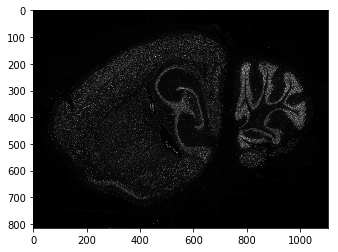

In [11]:
# Visualizing an example Ntb thumbnail image
img_fp = DataManager.get_image_filepath_v2(stack='UCSD001', resol='thumbnail', \
                            prep_id=None, version='Ntb', fn=image_name_list[100])
print 'img fp: '+img_fp+'\n'

img = imread(img_fp)
print 'img data type:',img.dtype

plt.imshow(img, cmap=plt.cm.gray);

The image is very dim because most pixel intensities are concentrated at the bottom part of the 0-2^15 range.
To enhance the contrast, we stretch the histogram so that the entire available intensity range is utilized.
- Create input_spec.ini as (None,Ntb,thumbnail). 
- call the resulting version "NtbNormalized". Note that this is just a global linear histogram stretching - not to be confused with the local adaptive intensity correction that we will do later.

In [12]:
# OG
create_input_spec_ini( name='input_spec.ini', image_name_list=image_name_list, \
        stack='UCSD001', prep_id='None', version='Ntb', resol='thumbnail')

In [13]:
! python normalize_intensity.py input_spec.ini NtbNormalized

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/operation_configs/from_none_to_aligned.ini
****************************************************************
Failed to cache DEMO998 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/DEMO998_sorted_filenames.txt
Failed to cache DEMO998 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/DEMO998_sorted_filenames.txt
Failed to cache DEMO998 filenames_to_sections: 
No anchor.txt is found. Seems we a

return code: 0
Intensity normalize: 0.04 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide004_2018_09_03-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide004_2018_09_03-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.04 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide005_2018_09_03-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide005_2018_09_03-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.03 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide005_2018_09_03-S2_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide010_2018_09_03-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide010_2018_09_03-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide010_2018_09_03-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide010_2018_09_03-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.05 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide011_2018_09_03-S1_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide016_2018_09_03-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide016_2018_09_03-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide016_2018_09_03-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide016_2018_09_03-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide016_2018_09_03-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide021_2018_09_03-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide021_2018_09_03-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide021_2018_09_03-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide021_2018_09_03-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide021_2018_09_03-S4_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide027_2018_09_03-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide027_2018_09_03-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide027_2018_09_03-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide027_2018_09_03-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide027_2018_09_03-S4_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide032_2018_09_03-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide032_2018_09_03-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide032_2018_09_03-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide032_2018_09_03-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide033_2018_09_03-S1_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.09 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide038_2018_09_03-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide038_2018_09_03-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.09 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide038_2018_09_03-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide038_2018_09_03-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide038_2018_09_03-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.09 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide043_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide043_2018_09_04-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide044_2018_09_04-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide044_2018_09_04-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.09 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide044_2018_09_04-S2_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.14 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide049_2018_09_04-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide049_2018_09_04-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide049_2018_09_04-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide049_2018_09_04-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide049_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide054_2018_09_04-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide054_2018_09_04-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide054_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide054_2018_09_04-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide054_2018_09_04-S4_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.11 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide059_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide059_2018_09_04-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide060_2018_09_04-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide060_2018_09_04-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide060_2018_09_04-S2_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide065_2018_09_04-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide065_2018_09_04-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide065_2018_09_04-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide065_2018_09_04-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide065_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.19 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide070_2018_09_04-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide070_2018_09_04-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.15 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide070_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide070_2018_09_04-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.21 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide070_2018_09_04-S4_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.64 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide075_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide075_2018_09_04-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.21 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide075_2018_09_04-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide075_2018_09_04-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide076_2018_09_04-S1_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.09 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide080_2018_09_05-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide080_2018_09_05-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide081_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide081_2018_09_05-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide081_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide086_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide086_2018_09_05-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide086_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide086_2018_09_05-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide086_2018_09_05-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide091_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide091_2018_09_05-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide091_2018_09_05-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide091_2018_09_05-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide091_2018_09_05-S4_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide097_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide097_2018_09_05-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide097_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide097_2018_09_05-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide097_2018_09_05-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide103_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide103_2018_09_05-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide103_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide103_2018_09_05-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide103_2018_09_05-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide109_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide109_2018_09_05-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.05 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide109_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide109_2018_09_05-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide109_2018_09_05-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.05 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide114_2018_09_05-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide114_2018_09_05-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide115_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide115_2018_09_05-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide115_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.04 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide120_2018_09_05-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide120_2018_09_05-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.04 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide120_2018_09_05-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide120_2018_09_05-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.04 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide121_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -de

Let's see a resulting image

uint8


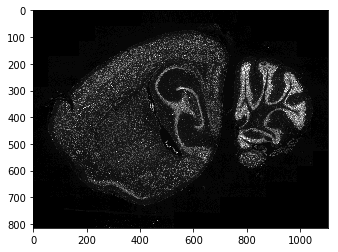

In [14]:
# Visualizing an example NORMALIZED Ntb thumbnail image

img_fp = DataManager.get_image_filepath_v2(stack='UCSD001', resol='thumbnail', \
                        prep_id=None, version='NtbNormalized', fn=image_name_list[100])

img = imread(img_fp)
print img.dtype

plt.imshow(img, cmap=plt.cm.gray);

Now the tissues are much easier to see. Note that the normalized images are now 8-bit.

In [ ]:
# Looking at slices by eye:

file_suffix = '_thumbnail_NtbNormalized.tif'

slices_blurry = ['UCSD001_slide003_2018_09_03-S1','UCSD001_slide071_2018_09_04-S2',
                'UCSD001_slide072_2018_09_04-S1','UCSD001_slide077_2018_09_04-S3',
                'UCSD001_slide080_2018_09_05-S4','UCSD001_slide081_2018_09_05-S1',
                'UCSD001_slide082_2018_09_05-S4','UCSD001_slide090_2018_09_05-S1',
                'UCSD001_slide090_2018_09_05-S2','UCSD001_slide103_2018_09_05-S4',
                'UCSD001_slide111_2018_09_05-S1','UCSD001_slide113_2018_09_05-S1']

slices_background_artifacts = ['UCSD001_slide004_2018_09_03-S1',\
                'UCSD001_slide050_2018_09_04-S2','UCSD001_slide125_2018_09_05-S1']

slices_awful = ['UCSD001_slide062_2018_09_04-S4','UCSD001_slide093_2018_09_05-S3']

slices_missing_chunk = []

# Step 3
### 3) Intra-Stack Alignment
Skipping a GUI step the should be at the very beginning of step 3: (It doesn't exist though...)

`python preprocess_gui.py`

In [127]:
os.environ['DATA_ROOTDIR']
stack = 'UCSD001'

In [159]:
DATA_ROOTDIR = os.environ['DATA_ROOTDIR'] # THUMBNAIL_DATA_DIR
stack='UCSD001'

# Creating 'from_none_to_aligned.ini'
# First designate an anchor to use
anchor_fn = 'UCSD001_slide061_2018_09_04-S2'
none_to_aligned_fp = os.path.join(DATA_ROOTDIR, 'CSHL_data_processed', \
                stack, 'operation_configs', 'from_none_to_aligned.ini')
anchor_text_fp = os.path.join(DATA_ROOTDIR, 'CSHL_data_processed', \
                stack, stack+'_anchor.txt')

from_none_to_aligned_content = '[DEFAULT]\n\
type=warp\n\
\n\
base_prep_id=None\n\
dest_prep_id=aligned\n\
\n\
# For align\n\
elastix_parameter_fp='+REPO_DIR+'/preprocess/parameters/Parameters_Rigid_MutualInfo_\
noNumberOfSpatialSamples_4000Iters.txt\n\
elastix_output_dir='+DATA_ROOTDIR+'CSHL_data_processed\
/'+stack+'/'+stack+'_elastix_output\n\
custom_output_dir='+DATA_ROOTDIR+'CSHL_data_processed\
/'+stack+'/'+stack+'_custom_output\n\
\n\
# For compose\n\
anchor_image_name='+anchor_fn+'\n\
transforms_csv='+DATA_ROOTDIR+'CSHL_data_processed/'+stack+'\
/'+stack+'_transforms_to_anchor.csv\n\
#transforms_csv='+DATA_ROOTDIR+'CSHL_data_processed/'+stack+'\
/'+stack+'_transformsTo_'+anchor_fn+'.csv\n\
resolution=thumbnail'

if not os.path.exists(os.path.dirname(none_to_aligned_fp)):
    os.makedirs(os.path.dirname(none_to_aligned_fp))

f = open( none_to_aligned_fp , "w")
f.write( from_none_to_aligned_content ) 
f.close()

f = open( anchor_text_fp , "w")
f.write( anchor_fn ) 
f.close()

#create_input_spec_ini( name='input_spec.ini', image_name_list=image_name_list, \
#        stack='UCSD001', prep_id='None', version='NtbNormalized', resol='thumbnail')

# OG
create_input_spec_ini_all( name='input_spec.ini', \
        stack='UCSD001', prep_id='None', version='NtbNormalized', resol='thumbnail')

In [136]:
! python align_compose.py input_spec.ini --op from_none_to_aligned

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
python align_v3.py input_spec.ini --op from_none_to_aligned
ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
No vtk
No mcubes
Failed to cache UCSD001 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_sectionLimits.ini does not exist.
Seems you are using operation INIs to provide cropbox.
Failed to cache UCSD001 valid_sections/filenames: UCSD001
Seems you are using operation INIs to provide cropbox.
{'image_name_list': 'all', 'resol': 'thumbnail', 'version': 'NtbNormalized', 'prep_id': 'None', 'stack': 'UCSD001'}
rm -f /media/alexn/BstemAtlasDataBackup/ucsd_brain/mousebrainatlas_tmp/stderr_*; rm -f /media/alexn/BstemAtlasDat

Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide027_2018_09_03-S2_to_UCSD001_slide028_2018_09_03-S1/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide028_2018_09_03-S2_to_UCSD001_slide027_2018_09_03-S2/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide027_2018_09_03-S3_to_UCSD001_slide028_2018_09_03-S2/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide028_2018_09_03-S3_to_UCSD001_slide027_2018_09_03-S3/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elasti

Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide065_2018_09_04-S1_to_UCSD001_slide064_2018_09_04-S4/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide066_2018_09_04-S1_to_UCSD001_slide065_2018_09_04-S1/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide065_2018_09_04-S2_to_UCSD001_slide066_2018_09_04-S1/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide066_2018_09_04-S2_to_UCSD001_slide065_2018_09_04-S2/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elasti

Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide104_2018_09_05-S2_to_UCSD001_slide103_2018_09_05-S2/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide103_2018_09_05-S3_to_UCSD001_slide104_2018_09_05-S2/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide104_2018_09_05-S3_to_UCSD001_slide103_2018_09_05-S3/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide104_2018_09_05-S4_to_UCSD001_slide104_2018_09_05-S3/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elasti

2 UCSD001_slide001_2018_09_03-S2 [[ 9.88572958e-01 -1.50743180e-01 -5.48980497e+02]
 [ 1.50743180e-01  9.88572958e-01 -3.71905861e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
3 UCSD001_slide002_2018_09_03-S2 [[ 9.96961334e-01 -7.78980020e-02 -5.63171273e+02]
 [ 7.78980020e-02  9.96961334e-01 -3.28622694e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
4 UCSD001_slide001_2018_09_03-S3 [[ 9.81660983e-01 -1.90635031e-01 -5.22351984e+02]
 [ 1.90635031e-01  9.81660983e-01 -4.63348904e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
5 UCSD001_slide002_2018_09_03-S3 [[ 9.88674485e-01 -1.50075859e-01 -5.19602469e+02]
 [ 1.50075859e-01  9.88674485e-01 -4.04327737e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
6 UCSD001_slide004_2018_09_03-S1 [[ 9.88676286e-01 -1.50063995e-01 -4.75126754e+02]
 [ 1.50063995e-01  9.88676286e-01 -3.90809229e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
7 UCSD001_slide003_2018_09_03-S2 [[ 9.81119296e-01 -1.93403534e-0

57 UCSD001_slide016_2018_09_03-S4 [[ 9.98391512e-01 -5.66955824e-02 -4.11779264e+02]
 [ 5.66955824e-02  9.98391512e-01 -1.49334779e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
58 UCSD001_slide017_2018_09_03-S1 [[ 9.74584629e-01 -2.24019646e-01 -2.67494298e+02]
 [ 2.24019646e-01  9.74584629e-01 -2.89447639e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
59 UCSD001_slide018_2018_09_03-S1 [[ 9.93768707e-01 -1.11461904e-01 -3.66324288e+02]
 [ 1.11461904e-01  9.93768707e-01 -1.99529730e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
60 UCSD001_slide017_2018_09_03-S2 [[ 9.89763961e-01 -1.42714055e-01 -3.00421252e+02]
 [ 1.42714055e-01  9.89763961e-01 -2.32054298e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
61 UCSD001_slide018_2018_09_03-S2 [[ 9.94417688e-01 -1.05515221e-01 -3.20158899e+02]
 [ 1.05515221e-01  9.94417688e-01 -1.59740049e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
62 UCSD001_slide017_2018_09_03-S3 [[ 9.97362803e-01 -7.25771

103 UCSD001_slide029_2018_09_03-S1 [[ 9.96436892e-01 -8.43416842e-02 -2.28545666e+02]
 [ 8.43416842e-02  9.96436892e-01 -1.09904343e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
104 UCSD001_slide030_2018_09_03-S1 [[ 9.91334961e-01 -1.31358272e-01 -1.77056536e+02]
 [ 1.31358272e-01  9.91334961e-01 -1.55681799e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
105 UCSD001_slide029_2018_09_03-S2 [[ 9.93620148e-01 -1.12778549e-01 -2.22748092e+02]
 [ 1.12778549e-01  9.93620148e-01 -1.47990784e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
106 UCSD001_slide030_2018_09_03-S2 [[ 9.92469673e-01 -1.22490606e-01 -1.89140716e+02]
 [ 1.22490606e-01  9.92469673e-01 -1.54818869e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
107 UCSD001_slide029_2018_09_03-S3 [[ 9.99359392e-01 -3.57883559e-02 -2.81230839e+02]
 [ 3.57883559e-02  9.99359392e-01 -6.13393875e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
108 UCSD001_slide030_2018_09_03-S3 [[ 9.94913812e-01 -1

177 UCSD001_slide048_2018_09_04-S4 [[ 9.80505994e-01  1.96489173e-01 -2.54129033e+02]
 [-1.96489173e-01  9.80505994e-01  2.07685849e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
178 UCSD001_slide049_2018_09_04-S1 [[ 9.99982042e-01 -5.99296413e-03 -2.08340614e+02]
 [ 5.99296413e-03  9.99982042e-01 -3.37737933e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
179 UCSD001_slide050_2018_09_04-S1 [[ 9.98496664e-01 -5.48125163e-02 -1.51288553e+02]
 [ 5.48125163e-02  9.98496664e-01 -4.32925071e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
180 UCSD001_slide049_2018_09_04-S2 [[ 9.99997421e-01 -2.27099805e-03 -2.15428592e+02]
 [ 2.27099805e-03  9.99997421e-01  1.58911629e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
181 UCSD001_slide050_2018_09_04-S2 [[ 9.97058081e-01 -7.66497456e-02 -1.62632455e+02]
 [ 7.66497456e-02  9.97058081e-01 -1.17074377e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
182 UCSD001_slide049_2018_09_04-S3 [[ 9.99998067e-01  1

270 UCSD001_slide073_2018_09_04-S1 [[ 9.99190883e-01 -4.02191492e-02 -1.02490415e+02]
 [ 4.02191492e-02  9.99190883e-01 -8.32545737e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
271 UCSD001_slide074_2018_09_04-S1 [[ 9.92337669e-01 -1.23555455e-01 -5.96280671e+01]
 [ 1.23555455e-01  9.92337669e-01 -1.29746368e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
272 UCSD001_slide073_2018_09_04-S2 [[ 9.98162625e-01 -6.05918627e-02 -8.09764680e+01]
 [ 6.05918627e-02  9.98162625e-01 -8.53243324e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
273 UCSD001_slide074_2018_09_04-S2 [[ 9.95641017e-01 -9.32682450e-02 -2.15589754e+01]
 [ 9.32682450e-02  9.95641017e-01 -1.46176217e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
274 UCSD001_slide073_2018_09_04-S3 [[ 9.99000496e-01  4.46991017e-02 -1.70548010e+02]
 [-4.46991017e-02  9.99000496e-01  3.19508253e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
275 UCSD001_slide074_2018_09_04-S3 [[ 9.99749018e-01 -2

396 UCSD001_slide107_2018_09_05-S1 [[ 9.92952879e-01 -1.18509829e-01 -3.20296892e+02]
 [ 1.18509829e-01  9.92952879e-01 -2.43102524e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
397 UCSD001_slide108_2018_09_05-S2 [[ 9.98071173e-01 -6.20800553e-02 -3.44319839e+02]
 [ 6.20800553e-02  9.98071173e-01 -1.77024136e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
398 UCSD001_slide107_2018_09_05-S2 [[ 9.93536647e-01 -1.13511810e-01 -3.18819422e+02]
 [ 1.13511810e-01  9.93536647e-01 -2.68656310e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
399 UCSD001_slide108_2018_09_05-S3 [[ 9.94813296e-01 -1.01717774e-01 -3.11299341e+02]
 [ 1.01717774e-01  9.94813296e-01 -1.71055746e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
400 UCSD001_slide109_2018_09_05-S1 [[ 9.92033114e-01 -1.25977381e-01 -2.72812764e+02]
 [ 1.25977381e-01  9.92033114e-01 -2.23454306e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
401 UCSD001_slide109_2018_09_05-S2 [[ 9.92040041e-01 -1

return code: 0


In [160]:
! python warp_crop.py --input_spec input_spec.ini --op_id from_none_to_padded

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD585 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_sorted_filenames.txt
Failed to cache MD585 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_sorted_filenames.txt
Failed to cache MD585 filenames_to_sections: 
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD585 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_process

In [155]:
# python src/gui/preprocess_tool_v3.py UCSD001 --tb_version NtbNormalized
! python ../src/gui/preprocess_tool_v3.py UCSD001 --tb_version NtbNormalized

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD585 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_sorted_filenames.txt
Failed to cache MD585 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_sorted_filenames.txt
Failed to cache MD585 filenames_to_sections: 
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD585 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_process

prep1_thumbnail_NtbNormalized.tf files have been generated for all of the files.


# STEP 4
### 4) Create Masks

"Create Masks" step requires running the following GUI twice:

`python src/gui/mask_editing_tool_v4.py DEMO998 NtbNormalized`

Now we move on to the mask generation step. It starts with running the mask_editing_tool_v4.py GUI for drawing the initial snake contours.

In [ ]:
! python ../src/gui/mask_editing_tool_v4.py UCSD001 NtbNormalized

In [14]:
# OG
create_input_spec_ini_all( name='input_spec.ini', stack='UCSD001', \
            prep_id='alignedPadded', version='NtbNormalized', resol='thumbnail')

In [22]:
# TESTING
# If anything prints out, then there is a problem with sorted_filenames.txt
f = open('/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/\
UCSD001_prep1_thumbnail_initSnakeContours.pkl', "r")
    
file_contents = f.read().replace('\n','')
all_fns = get_fn_list_from_sorted_filenames( 'UCSD001' )

for fn in all_fns:
    if fn in file_contents:
        continue
    else:
        print fn

In [26]:
# TESTING
files_all = get_fn_list_from_sorted_filenames('UCSD001')
files_exist = ! ls /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep1_thumbnail_autoSubmasks

files_to_process = list(set(files_all) - set(files_exist))
print len(files_to_process)
print files_to_process

#files_to_process = ['UCSD001_slide067_2018_09_04-S3','UCSD001_slide033_2018_09_03-S3']

create_input_spec_ini( name='input_spec.ini', image_name_list=files_to_process, stack='UCSD001', \
            prep_id='alignedPadded', version='NtbNormalized', resol='thumbnail')

10
['UCSD001_slide001_2018_09_03-S3', 'UCSD001_slide122_2018_09_05-S4', 'UCSD001_slide125_2018_09_05-S1', 'UCSD001_slide123_2018_09_05-S4', 'UCSD001_slide123_2018_09_05-S1', 'UCSD001_slide123_2018_09_05-S2', 'UCSD001_slide125_2018_09_05-S2', 'UCSD001_slide125_2018_09_05-S3', 'UCSD001_slide002_2018_09_03-S3', 'UCSD001_slide124_2018_09_05-S2']


In [27]:
fp = os.path.join(os.environ['DATA_ROOTDIR'],'CSHL_data_processed',stack,\
                  stack+'_prep1_thumbnail_initSnakeContours.pkl')

! python masking.py input_spec.ini $fp

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD662 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/MD662_sorted_filenames.txt
Failed to cache MD662 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/MD662_sorted_filenames.txt
Failed to cache MD662 filenames_to_sections: 
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD662 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_process

Morphsnake iter 125 Component sizes: [407855]
Morphsnake iter 126 Component sizes: [405409]
Morphsnake iter 127 Component sizes: [402969]
Morphsnake iter 128 Component sizes: [400536]
Morphsnake iter 129 Component sizes: [398108]
Morphsnake iter 130 Component sizes: [395684]
Morphsnake iter 131 Component sizes: [393266]
Morphsnake iter 132 Component sizes: [390852]
Morphsnake iter 133 Component sizes: [388443]
Morphsnake iter 134 Component sizes: [386039]
Morphsnake iter 135 Component sizes: [383642]
Morphsnake iter 136 Component sizes: [381249]
Morphsnake iter 137 Component sizes: [378862]
Morphsnake iter 138 Component sizes: [376482]
Morphsnake iter 139 Component sizes: [374107]
Morphsnake iter 140 Component sizes: [371733]
Morphsnake iter 141 Component sizes: [369367]
Morphsnake iter 142 Component sizes: [367008]
Morphsnake iter 143 Component sizes: [364652]
Morphsnake iter 144 Component sizes: [362302]
Morphsnake iter 145 Component sizes: [359957]
Morphsnake iter 146 Component size

Morphsnake iter 276 Component sizes: [134695]
Component area is too small - nullified.
Morphsnake iter 277 Component sizes: [133956, 1]
Morphsnake iter 278 Component sizes: [133013]
Morphsnake iter 279 Component sizes: [132290]
Morphsnake iter 280 Component sizes: [131367]
Morphsnake iter 281 Component sizes: [130672]
Component area is too small - nullified.
Morphsnake iter 282 Component sizes: [129772, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 283 Component sizes: [129090, 3, 1]
Morphsnake iter 284 Component sizes: [128217]
Morphsnake iter 285 Component sizes: [127561]
Morphsnake iter 286 Component sizes: [126705]
Morphsnake iter 287 Component sizes: [126072]
Component area is too small - nullified.
Morphsnake iter 288 Component sizes: [125230, 1]
Morphsnake iter 289 Component sizes: [124623]
Component area is too small - nullified.
Morphsnake iter 290 Component sizes: [123810, 1]
Morphsnake iter 291 Component sizes: [122127]


Morphsnake iter 75 Component sizes: [588030]
Morphsnake iter 76 Component sizes: [585189]
Morphsnake iter 77 Component sizes: [582358]
Morphsnake iter 78 Component sizes: [579530]
Morphsnake iter 79 Component sizes: [576708]
Morphsnake iter 80 Component sizes: [573889]
Morphsnake iter 81 Component sizes: [571080]
Morphsnake iter 82 Component sizes: [568276]
Morphsnake iter 83 Component sizes: [565477]
Morphsnake iter 84 Component sizes: [562682]
Morphsnake iter 85 Component sizes: [559895]
Morphsnake iter 86 Component sizes: [557113]
Morphsnake iter 87 Component sizes: [554336]
Morphsnake iter 88 Component sizes: [551565]
Morphsnake iter 89 Component sizes: [548801]
Morphsnake iter 90 Component sizes: [546038]
Morphsnake iter 91 Component sizes: [543285]
Morphsnake iter 92 Component sizes: [540537]
Morphsnake iter 93 Component sizes: [537794]
Morphsnake iter 94 Component sizes: [535055]
Morphsnake iter 95 Component sizes: [532324]
Morphsnake iter 96 Component sizes: [529596]
Morphsnake

Component area is too small - nullified.
Morphsnake iter 227 Component sizes: [235546, 2]
Morphsnake iter 228 Component sizes: [234003]
Morphsnake iter 229 Component sizes: [232604]
Component area is too small - nullified.
Morphsnake iter 230 Component sizes: [231068, 9]
Morphsnake iter 231 Component sizes: [229686]
Morphsnake iter 232 Component sizes: [228175]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 233 Component sizes: [226811, 3, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 234 Component sizes: [225324, 2, 1]
Morphsnake iter 235 Component sizes: [223989]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 236 Component sizes: [222512, 1, 3]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 237 Component sizes: [221213, 1, 1]
Component area is too small - nullified.
Morphsnake it

Morphsnake iter 353 Component sizes: [96802]
Component area is too small - nullified.
Morphsnake iter 354 Component sizes: [96224, 1]
Component area is too small - nullified.
Morphsnake iter 355 Component sizes: [95813, 63]
Morphsnake iter 356 Component sizes: [95246]
Component area is too small - nullified.
Morphsnake iter 357 Component sizes: [94907, 1]
Component area is too small - nullified.
Morphsnake iter 358 Component sizes: [94337, 1]
Morphsnake iter 359 Component sizes: [94017]
Morphsnake iter 360 Component sizes: [93474]
Morphsnake iter 361 Component sizes: [93174]
Morphsnake iter 362 Component sizes: [92633]
Morphsnake iter 363 Component sizes: [92336]
Morphsnake iter 364 Component sizes: [91800]
Morphsnake iter 365 Component sizes: [91517]
Morphsnake iter 366 Component sizes: [90993]
Morphsnake iter 367 Component sizes: [90712]
Morphsnake iter 368 Component sizes: [90189]
Component area is too small - nullified.
Morphsnake iter 369 Component sizes: [89914, 4]
Morphsnake ite

Morphsnake iter 109 Component sizes: [494642]
Morphsnake iter 110 Component sizes: [491995]
Morphsnake iter 111 Component sizes: [489352]
Morphsnake iter 112 Component sizes: [486714]
Morphsnake iter 113 Component sizes: [484083]
Morphsnake iter 114 Component sizes: [481459]
Morphsnake iter 115 Component sizes: [478839]
Morphsnake iter 116 Component sizes: [476221]
Morphsnake iter 117 Component sizes: [473613]
Morphsnake iter 118 Component sizes: [471012]
Morphsnake iter 119 Component sizes: [468415]
Morphsnake iter 120 Component sizes: [465822]
Morphsnake iter 121 Component sizes: [463236]
Morphsnake iter 122 Component sizes: [460652]
Morphsnake iter 123 Component sizes: [458078]
Morphsnake iter 124 Component sizes: [455510]
Morphsnake iter 125 Component sizes: [452947]
Morphsnake iter 126 Component sizes: [450389]
Morphsnake iter 127 Component sizes: [447838]
Morphsnake iter 128 Component sizes: [445290]
Morphsnake iter 129 Component sizes: [442748]
Morphsnake iter 130 Component size

Morphsnake iter 283 Component sizes: [134927]
Morphsnake iter 284 Component sizes: [133562]
Morphsnake iter 285 Component sizes: [132250]
Morphsnake iter 286 Component sizes: [130898]
Morphsnake iter 287 Component sizes: [129614]
Component area is too small - nullified.
Morphsnake iter 288 Component sizes: [128275, 2]
Morphsnake iter 289 Component sizes: [127027]
Morphsnake iter 290 Component sizes: [125728]
Morphsnake iter 291 Component sizes: [124499]
Morphsnake iter 292 Component sizes: [123214]
Morphsnake iter 293 Component sizes: [122008]
Component area is too small - nullified.
Morphsnake iter 294 Component sizes: [120743, 1]
Morphsnake iter 295 Component sizes: [119557]
Morphsnake iter 296 Component sizes: [118314]
Morphsnake iter 297 Component sizes: [117163]
Morphsnake iter 298 Component sizes: [115947]
Morphsnake iter 299 Component sizes: [114810]
Morphsnake iter 300 Component sizes: [113603]
Morphsnake iter 301 Component sizes: [112471]
Component area is too small - nullifie

Morphsnake iter 112 Component sizes: [486714]
Morphsnake iter 113 Component sizes: [484083]
Morphsnake iter 114 Component sizes: [481459]
Morphsnake iter 115 Component sizes: [478839]
Morphsnake iter 116 Component sizes: [476221]
Morphsnake iter 117 Component sizes: [473613]
Morphsnake iter 118 Component sizes: [471012]
Morphsnake iter 119 Component sizes: [468415]
Morphsnake iter 120 Component sizes: [465822]
Morphsnake iter 121 Component sizes: [463236]
Morphsnake iter 122 Component sizes: [460652]
Morphsnake iter 123 Component sizes: [458078]
Morphsnake iter 124 Component sizes: [455510]
Morphsnake iter 125 Component sizes: [452947]
Morphsnake iter 126 Component sizes: [450389]
Morphsnake iter 127 Component sizes: [447838]
Morphsnake iter 128 Component sizes: [445290]
Morphsnake iter 129 Component sizes: [442748]
Morphsnake iter 130 Component sizes: [440209]
Morphsnake iter 131 Component sizes: [437679]
Morphsnake iter 132 Component sizes: [435156]
Morphsnake iter 133 Component size

Morphsnake iter 250 Component sizes: [194550]
Morphsnake iter 251 Component sizes: [193235]
Morphsnake iter 252 Component sizes: [191811]
Component area is too small - nullified.
Morphsnake iter 253 Component sizes: [190523, 1]
Morphsnake iter 254 Component sizes: [189122]
Morphsnake iter 255 Component sizes: [187860]
Morphsnake iter 256 Component sizes: [186476]
Component area is too small - nullified.
Morphsnake iter 257 Component sizes: [185233, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 258 Component sizes: [183880, 1, 1]
Morphsnake iter 259 Component sizes: [182659]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 260 Component sizes: [181306, 1, 4]
Morphsnake iter 261 Component sizes: [180094]
Morphsnake iter 262 Component sizes: [178760]
Morphsnake iter 263 Component sizes: [177558]
Morphsnake iter 264 Component sizes: [176220]
Component area is too small - nullified.
Compo

Morphsnake iter 355 Component sizes: [85299]
Morphsnake iter 356 Component sizes: [83753]
Component area is too small - nullified.
Morphsnake iter 357 Component sizes: [82102, 139]
Morphsnake iter 358 Component sizes: [80673]
Area shrinks too much, stop iteration.
Snake finished at iteration 358.
Snake: 85.53 seconds
Discarded.
Snake return no valid submasks.
No submask is found.Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep1_thumbnail_NtbNormalized/UCSD001_slide123_2018_09_05-S1_prep1_thumbnail_NtbNormalized.tif
121(1 percentile), 254(99 percentile)
Found 1 levelsets.

Contour 0
Morphsnake iter 0 Component sizes: [816963]
Morphsnake iter 1 Component sizes: [813697]
Morphsnake iter 2 Component sizes: [810439]
Morphsnake iter 3 Component sizes: [807190]
Morphsnake iter 4 Component sizes: [803945]
Morphsnake iter 5 Component sizes: [800708]
Morphsnake iter 6 Component sizes: [797474]
Morphsnake iter 7 Component sizes: [794249]
Morphsn

Component area is too small - nullified.
Morphsnake iter 145 Component sizes: [405099, 1]
Component area is too small - nullified.
Morphsnake iter 146 Component sizes: [402773, 6]
Component area is too small - nullified.
Morphsnake iter 147 Component sizes: [400484, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 148 Component sizes: [398175, 2, 2, 1]
Component area is too small - nullified.
Morphsnake iter 149 Component sizes: [395933, 1]
Component area is too small - nullified.
Morphsnake iter 150 Component sizes: [393681, 3]
Morphsnake iter 151 Component sizes: [391488]
Component area is too small - nullified.
Morphsnake iter 152 Component sizes: [389152, 1]
Component area is too small - nullified.
Morphsnake iter 153 Component sizes: [1, 386868]
Component area is too small - nullified.
Morphsnake iter 154 Component sizes: [384560, 1]
Morphsnake iter 155 Component sizes: [382311]
Component 

Component area is too small - nullified.
Morphsnake iter 250 Component sizes: [216354, 1]
Morphsnake iter 251 Component sizes: [215083]
Morphsnake iter 252 Component sizes: [213701]
Component area is too small - nullified.
Morphsnake iter 253 Component sizes: [212447, 1]
Morphsnake iter 254 Component sizes: [211094]
Component area is too small - nullified.
Morphsnake iter 255 Component sizes: [209886, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 256 Component sizes: [208538, 5, 1]
Component area is too small - nullified.
Morphsnake iter 257 Component sizes: [207371, 1]
Morphsnake iter 258 Component sizes: [206081]
Morphsnake iter 259 Component sizes: [204940]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 260 Component sizes: [203618, 1, 1, 34]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter

Morphsnake iter 363 Component sizes: [88867]
Morphsnake iter 364 Component sizes: [88344]
Morphsnake iter 365 Component sizes: [88052]
Morphsnake iter 366 Component sizes: [87540]
Component area is too small - nullified.
Morphsnake iter 367 Component sizes: [87255, 2]
Morphsnake iter 368 Component sizes: [86759]
Morphsnake iter 369 Component sizes: [86489]
Morphsnake iter 370 Component sizes: [86004]
Morphsnake iter 371 Component sizes: [85750]
Morphsnake iter 372 Component sizes: [85273]
Morphsnake iter 373 Component sizes: [85019]
Morphsnake iter 374 Component sizes: [84546]
Morphsnake iter 375 Component sizes: [84305]
Morphsnake iter 376 Component sizes: [83838]
Morphsnake iter 377 Component sizes: [83595]
Morphsnake iter 378 Component sizes: [83131]
Morphsnake iter 379 Component sizes: [82892]
Morphsnake iter 380 Component sizes: [82433]
Morphsnake iter 381 Component sizes: [82203]
Morphsnake iter 382 Component sizes: [81751]
Morphsnake iter 383 Component sizes: [81527]
Area shrink

Morphsnake iter 150 Component sizes: [390830]
Component area is too small - nullified.
Morphsnake iter 151 Component sizes: [388428, 2]
Morphsnake iter 152 Component sizes: [386041]
Morphsnake iter 153 Component sizes: [383657]
Morphsnake iter 154 Component sizes: [381282]
Component area is too small - nullified.
Morphsnake iter 155 Component sizes: [378911, 3]
Morphsnake iter 156 Component sizes: [376560]
Component area is too small - nullified.
Morphsnake iter 157 Component sizes: [374208, 1]
Morphsnake iter 158 Component sizes: [371870]
Component area is too small - nullified.
Morphsnake iter 159 Component sizes: [369526, 1]
Morphsnake iter 160 Component sizes: [367200]
Morphsnake iter 161 Component sizes: [364887]
Morphsnake iter 162 Component sizes: [362574]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 163 Component sizes: [360265, 2, 1]
Morphsnake iter 164 Component sizes: [357980]
Component area is too small - nullified.
Morph

Morphsnake iter 264 Component sizes: [173886]
Morphsnake iter 265 Component sizes: [172182]
Morphsnake iter 266 Component sizes: [170506]
Morphsnake iter 267 Component sizes: [168823]
Morphsnake iter 268 Component sizes: [167168]
Morphsnake iter 269 Component sizes: [165509]
Morphsnake iter 270 Component sizes: [163891]
Morphsnake iter 271 Component sizes: [162279]
Morphsnake iter 272 Component sizes: [160707]
Component area is too small - nullified.
Morphsnake iter 273 Component sizes: [159127, 2]
Morphsnake iter 274 Component sizes: [157604]
Morphsnake iter 275 Component sizes: [156059]
Component area is too small - nullified.
Morphsnake iter 276 Component sizes: [154592, 4]
Morphsnake iter 277 Component sizes: [153114]
Morphsnake iter 278 Component sizes: [151736]
Morphsnake iter 279 Component sizes: [150323]
Morphsnake iter 280 Component sizes: [149015]
Morphsnake iter 281 Component sizes: [147661]
Morphsnake iter 282 Component sizes: [146388]
Morphsnake iter 283 Component sizes: [

Morphsnake iter 69 Component sizes: [605179]
Morphsnake iter 70 Component sizes: [602307]
Morphsnake iter 71 Component sizes: [599437]
Morphsnake iter 72 Component sizes: [596576]
Morphsnake iter 73 Component sizes: [593720]
Morphsnake iter 74 Component sizes: [590870]
Morphsnake iter 75 Component sizes: [588025]
Morphsnake iter 76 Component sizes: [585187]
Morphsnake iter 77 Component sizes: [582354]
Morphsnake iter 78 Component sizes: [579527]
Morphsnake iter 79 Component sizes: [576705]
Morphsnake iter 80 Component sizes: [573888]
Morphsnake iter 81 Component sizes: [571076]
Morphsnake iter 82 Component sizes: [568271]
Morphsnake iter 83 Component sizes: [565473]
Morphsnake iter 84 Component sizes: [562679]
Morphsnake iter 85 Component sizes: [559886]
Morphsnake iter 86 Component sizes: [557103]
Morphsnake iter 87 Component sizes: [554326]
Morphsnake iter 88 Component sizes: [551557]
Morphsnake iter 89 Component sizes: [548792]
Morphsnake iter 90 Component sizes: [546034]
Morphsnake

Component area is too small - nullified.
Morphsnake iter 226 Component sizes: [226403, 1]
Morphsnake iter 227 Component sizes: [224517]
Component area is too small - nullified.
Morphsnake iter 228 Component sizes: [222665, 1]
Morphsnake iter 229 Component sizes: [220801]
Morphsnake iter 230 Component sizes: [218984]
Component area is too small - nullified.
Morphsnake iter 231 Component sizes: [217160, 5]
Component area is too small - nullified.
Morphsnake iter 232 Component sizes: [215352, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 233 Component sizes: [213535, 1, 1]
Component area is too small - nullified.
Morphsnake iter 234 Component sizes: [211759, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 235 Component sizes: [209945, 2, 1]
Morphsnake iter 236 Component sizes: [208169]
Component area is too small - nullified.
Morphsnake iter 237 Component sizes: [206381, 1]
Morphsna

Morphsnake iter 10 Component sizes: [784607]
Morphsnake iter 11 Component sizes: [781403]
Morphsnake iter 12 Component sizes: [778203]
Morphsnake iter 13 Component sizes: [775010]
Morphsnake iter 14 Component sizes: [771823]
Morphsnake iter 15 Component sizes: [768643]
Morphsnake iter 16 Component sizes: [765465]
Morphsnake iter 17 Component sizes: [762294]
Morphsnake iter 18 Component sizes: [759129]
Morphsnake iter 19 Component sizes: [755971]
Morphsnake iter 20 Component sizes: [752816]
Morphsnake iter 21 Component sizes: [749669]
Morphsnake iter 22 Component sizes: [746529]
Morphsnake iter 23 Component sizes: [743393]
Morphsnake iter 24 Component sizes: [740260]
Morphsnake iter 25 Component sizes: [737136]
Morphsnake iter 26 Component sizes: [734018]
Morphsnake iter 27 Component sizes: [730904]
Morphsnake iter 28 Component sizes: [727790]
Morphsnake iter 29 Component sizes: [724687]
Morphsnake iter 30 Component sizes: [721590]
Morphsnake iter 31 Component sizes: [718501]
Morphsnake

Morphsnake iter 187 Component sizes: [305571]
Morphsnake iter 188 Component sizes: [303391]
Morphsnake iter 189 Component sizes: [301232]
Morphsnake iter 190 Component sizes: [299065]
Morphsnake iter 191 Component sizes: [296921]
Morphsnake iter 192 Component sizes: [294782]
Morphsnake iter 193 Component sizes: [292674]
Morphsnake iter 194 Component sizes: [290544]
Component area is too small - nullified.
Morphsnake iter 195 Component sizes: [288429, 1]
Morphsnake iter 196 Component sizes: [286314]
Morphsnake iter 197 Component sizes: [284204]
Morphsnake iter 198 Component sizes: [282096]
Morphsnake iter 199 Component sizes: [280006]
Morphsnake iter 200 Component sizes: [277925]
Morphsnake iter 201 Component sizes: [275862]
Component area is too small - nullified.
Morphsnake iter 202 Component sizes: [5, 273773]
Morphsnake iter 203 Component sizes: [271702]
Morphsnake iter 204 Component sizes: [269642]
Morphsnake iter 205 Component sizes: [267617]
Component area is too small - nullifie

Morphsnake iter 303 Component sizes: [110714]
Morphsnake iter 304 Component sizes: [109486]
Component area is too small - nullified.
Morphsnake iter 305 Component sizes: [108156, 210]
Component area is too small - nullified.
Morphsnake iter 306 Component sizes: [106948, 2]
Morphsnake iter 307 Component sizes: [105819]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 308 Component sizes: [104582, 2, 42]
Morphsnake iter 309 Component sizes: [103492]
Component area is too small - nullified.
Morphsnake iter 310 Component sizes: [102306, 2]
Component area is too small - nullified.
Morphsnake iter 311 Component sizes: [101235, 5]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 312 Component sizes: [100064, 6, 2]
Morphsnake iter 313 Component sizes: [99040]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 314 Component sizes: [97910, 2, 1]
Morphsn

Morphsnake iter 123 Component sizes: [412763]
Morphsnake iter 124 Component sizes: [410310]
Morphsnake iter 125 Component sizes: [407859]
Morphsnake iter 126 Component sizes: [405415]
Morphsnake iter 127 Component sizes: [402978]
Morphsnake iter 128 Component sizes: [400546]
Morphsnake iter 129 Component sizes: [398120]
Morphsnake iter 130 Component sizes: [395697]
Morphsnake iter 131 Component sizes: [393274]
Morphsnake iter 132 Component sizes: [390860]
Morphsnake iter 133 Component sizes: [388454]
Morphsnake iter 134 Component sizes: [386053]
Morphsnake iter 135 Component sizes: [383653]
Morphsnake iter 136 Component sizes: [381263]
Morphsnake iter 137 Component sizes: [378882]
Morphsnake iter 138 Component sizes: [376506]
Morphsnake iter 139 Component sizes: [374131]
Morphsnake iter 140 Component sizes: [371768]
Morphsnake iter 141 Component sizes: [369405]
Morphsnake iter 142 Component sizes: [367048]
Morphsnake iter 143 Component sizes: [364698]
Morphsnake iter 144 Component size

Component area is too small - nullified.
Morphsnake iter 256 Component sizes: [167249, 1]
Component area is too small - nullified.
Morphsnake iter 257 Component sizes: [166148, 8]
Morphsnake iter 258 Component sizes: [165219]
Morphsnake iter 259 Component sizes: [164137]
Component area is too small - nullified.
Morphsnake iter 260 Component sizes: [163221, 1]
Morphsnake iter 261 Component sizes: [162160]
Morphsnake iter 262 Component sizes: [161267]
Component area is too small - nullified.
Morphsnake iter 263 Component sizes: [160227, 1]
Morphsnake iter 264 Component sizes: [159369]
Morphsnake iter 265 Component sizes: [158357]
Component area is too small - nullified.
Morphsnake iter 266 Component sizes: [157515, 1]
Component area is too small - nullified.
Morphsnake iter 267 Component sizes: [156524, 5]
Component area is too small - nullified.
Morphsnake iter 268 Component sizes: [155698, 1]
Component area is too small - nullified.
Morphsnake iter 269 Component sizes: [154720, 1]
Comp

Morphsnake iter 33 Component sizes: [712334]
Morphsnake iter 34 Component sizes: [709259]
Morphsnake iter 35 Component sizes: [706191]
Morphsnake iter 36 Component sizes: [703129]
Morphsnake iter 37 Component sizes: [700071]
Morphsnake iter 38 Component sizes: [697017]
Morphsnake iter 39 Component sizes: [693970]
Morphsnake iter 40 Component sizes: [690927]
Morphsnake iter 41 Component sizes: [687892]
Morphsnake iter 42 Component sizes: [684861]
Morphsnake iter 43 Component sizes: [681839]
Morphsnake iter 44 Component sizes: [678821]
Morphsnake iter 45 Component sizes: [675809]
Morphsnake iter 46 Component sizes: [672800]
Morphsnake iter 47 Component sizes: [669798]
Morphsnake iter 48 Component sizes: [666802]
Morphsnake iter 49 Component sizes: [663812]
Morphsnake iter 50 Component sizes: [660825]
Morphsnake iter 51 Component sizes: [657846]
Morphsnake iter 52 Component sizes: [654873]
Morphsnake iter 53 Component sizes: [651906]
Morphsnake iter 54 Component sizes: [648941]
Morphsnake

Component area is too small - nullified.
Morphsnake iter 188 Component sizes: [307676, 11]
Morphsnake iter 189 Component sizes: [305756]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 190 Component sizes: [303772, 3, 1]
Morphsnake iter 191 Component sizes: [301878]
Component area is too small - nullified.
Morphsnake iter 192 Component sizes: [299932, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 193 Component sizes: [298040, 1, 2]
Morphsnake iter 194 Component sizes: [296110]
Morphsnake iter 195 Component sizes: [294252]
Component area is too small - nullified.
Morphsnake iter 196 Component sizes: [292343, 2]
Morphsnake iter 197 Component sizes: [290514]
Component area is too small - nullified.
Morphsnake iter 198 Component sizes: [288619, 6]
Component area is too small - nullified.
Morphsnake iter 199 Component sizes: [286803, 1]
Component area is too small - nullified.
Component 

Morphsnake iter 334 Component sizes: [92669]
Morphsnake iter 335 Component sizes: [91660]
Morphsnake iter 336 Component sizes: [90608]
Morphsnake iter 337 Component sizes: [89645]
Component area is too small - nullified.
Morphsnake iter 338 Component sizes: [88608, 1]
Component area is too small - nullified.
Morphsnake iter 339 Component sizes: [87692, 2]
Morphsnake iter 340 Component sizes: [86702]
Morphsnake iter 341 Component sizes: [85836]
Morphsnake iter 342 Component sizes: [84902]
Morphsnake iter 343 Component sizes: [84096]
Morphsnake iter 344 Component sizes: [83191]
Component area is too small - nullified.
Morphsnake iter 345 Component sizes: [82430, 1]
Morphsnake iter 346 Component sizes: [81558]
Area shrinks too much, stop iteration.
Snake finished at iteration 346.
Snake: 82.48 seconds
Discarded.
Snake return no valid submasks.
No submask is found.Generate contours: 861.26


In [80]:
# Masking requires a check after, sometimes auto-masks are NOT generated!
# TESTING
# CAN BE REPLACED BY RUNNING GUI ??
files_all = get_fn_list_from_sorted_filenames('UCSD001')
files_exist = ! ls /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/\
UCSD001_prep1_thumbnail_autoSubmasks

#files_no_autosubmask = list(set(files_all) - set(files_exist))
print len(files_no_autosubmask)
print files_no_autosubmask
print ''

lowest_section_num = min(metadata_cache['sections_to_filenames']['UCSD001'].keys())
highest_section_num = max(metadata_cache['sections_to_filenames']['UCSD001'].keys())

for filename in files_no_autosubmask:
    print '-----------------------------------------'
    print '\nFor: '+filename+'\n-'
    section_num = metadata_cache['filenames_to_sections']['UCSD001'][filename]
    
    # Check for generated masks within 5 sections before or after, and just use that as an approximation
    for neighbor_section_modifier in range(1,5):
        # Check above
        neighbor_section = section_num + neighbor_section_modifier
        if not neighbor_section > highest_section_num:
            neighbor_fn = metadata_cache['sections_to_filenames']['UCSD001'][neighbor_section]
            if not neighbor_fn == 'Placeholder':
                if not neighbor_fn in files_no_autosubmask:
                    #print metadata_cache['sections_to_filenames']['UCSD001'][neighbor_section]
                    break
        # Check below
        neighbor_section = section_num - neighbor_section_modifier
        if not neighbor_section < lowest_section_num:
            neighbor_fn = metadata_cache['sections_to_filenames']['UCSD001'][neighbor_section]
            if not neighbor_fn == 'Placeholder':
                if not neighbor_fn in files_no_autosubmask:
                    #print metadata_cache['sections_to_filenames']['UCSD001'][neighbor_section]
                    break
    neighbor_fn = metadata_cache['sections_to_filenames']['UCSD001'][neighbor_section]
    print 'Closest viable section:',neighbor_section
    print 'Filename:',neighbor_fn
#     print '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/\
# UCSD001_prep1_thumbnail_autoSubmasks/'+neighbor_fn+'/'+neighbor_fn+'_prep1_thumbnail_autoSubmask_0.png'
    ! mkdir '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/\
UCSD001_prep1_thumbnail_autoSubmasks/'$filename'/'
    ! cp '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/\
UCSD001_prep1_thumbnail_autoSubmasks/'$neighbor_fn'/'$neighbor_fn'_prep1_thumbnail_autoSubmask_0.png' \
'/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/\
UCSD001_prep1_thumbnail_autoSubmasks/'$filename'/'$filename'_prep1_thumbnail_autoSubmask_0.png'
    ! cp '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/\
UCSD001_prep1_thumbnail_autoSubmasks/'$neighbor_fn'/'$neighbor_fn'_prep1_thumbnail_autoSubmaskDecisions.csv' \
'/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/\
UCSD001_prep1_thumbnail_autoSubmasks/'$filename'/'$filename'_prep1_thumbnail_autoSubmaskDecisions.csv'

10
['UCSD001_slide001_2018_09_03-S3', 'UCSD001_slide122_2018_09_05-S4', 'UCSD001_slide125_2018_09_05-S1', 'UCSD001_slide123_2018_09_05-S4', 'UCSD001_slide123_2018_09_05-S1', 'UCSD001_slide123_2018_09_05-S2', 'UCSD001_slide125_2018_09_05-S2', 'UCSD001_slide125_2018_09_05-S3', 'UCSD001_slide002_2018_09_03-S3', 'UCSD001_slide124_2018_09_05-S2']

-----------------------------------------

For: UCSD001_slide001_2018_09_03-S3
-
Closest viable section: 6
Filename: UCSD001_slide002_2018_09_03-S2
-----------------------------------------

For: UCSD001_slide122_2018_09_05-S4
-
Closest viable section: 487
Filename: UCSD001_slide121_2018_09_05-S2
-----------------------------------------

For: UCSD001_slide125_2018_09_05-S1
-
Closest viable section: 496
Filename: UCSD001_slide124_2018_09_05-S3
-----------------------------------------

For: UCSD001_slide123_2018_09_05-S4
-
Closest viable section: 496
Filename: UCSD001_slide124_2018_09_05-S3
-----------------------------------------

For: UCSD001_s

In [ ]:
# "Save final masks for all Sections"
# "Export Masks as PNG for All Sections"
# Will generate `prep1_thumbnail masks` for every section
! python ../src/gui/mask_editing_tool_v4.py UCSD001 NtbNormalized

***
Run GUI to double check auto-mask generation

MUST fix all problematic crops or intensity normalization won't work
***

In [57]:
# SLICE,X_left,Y_top,X_right,Y_bottom
# %%writefile DEMO998_original_image_crop.csv
# MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242,77,86,1175,524
# MD662&661-F84-2017.06.06-14.03.51_MD661_1_0250,77,86,1175,524
# MD662&661-F86-2017.06.06-14.56.48_MD661_2_0257,77,86,1175,524

Writing DEMO998_original_image_crop.csv


In [160]:
# OG
create_input_spec_ini_all( name='input_spec.ini', stack='UCSD001', \
            prep_id='None', version='NtbNormalized', resol='thumbnail')

# Creates STACK_original_image_crop.csv in data directory. x,y,width,height
! python generate_original_image_crop_csv.py input_spec.ini

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD662 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/MD662_sorted_filenames.txt
Failed to cache MD662 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/MD662_sorted_filenames.txt
Failed to cache MD662 filenames_to_sections: 
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD662 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_process

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide099_2018_09_05-S4_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide112_2018_09_05-S3_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide099_2018_09_05-S2_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide099_2018_09_05-S3_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide099_2018_09_05-S1_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide008_2018_09_03-S3_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide008_2018_09_03-S1_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide008_2018_09_03-S4_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide009_2018_09_03-S3_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide009_2018_09_03-S2_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide123_2018_09_05-S1_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide123_2018_09_05-S2_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide123_2018_09_05-S3_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide080_2018_09_05-S1_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide095_2018_09_05-S2_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide086_2018_09_05-S2_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide086_2018_09_05-S3_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide086_2018_09_05-S1_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide086_2018_09_05-S4_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide022_2018_09_03-S2_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide010_2018_09_03-S1_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide010_2018_09_03-S3_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide010_2018_09_03-S2_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide010_2018_09_03-S4_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide116_2018_09_05-S1_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide032_2018_09_03-S2_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide032_2018_09_03-S4_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide062_2018_09_04-S3_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide062_2018_09_04-S2_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide055_2018_09_04-S1_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide098_2018_09_05-S2_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide098_2018_09_05-S1_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide087_2018_09_05-S4_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide087_2018_09_05-S3_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide087_2018_09_05-S2_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide003_2018_09_03-S3_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide003_2018_09_03-S2_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide003_2018_09_03-S4_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide053_2018_09_04-S3_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide053_2018_09_04-S2_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide030_2018_09_03-S3_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide030_2018_09_03-S2_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide030_2018_09_03-S1_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide030_2018_09_03-S4_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide070_2018_09_04-S2_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide021_2018_09_03-S1_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide060_2018_09_04-S4_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide021_2018_09_03-S3_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide021_2018_09_03-S2_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide078_2018_09_04-S2_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail

In [203]:
# DIDN'T RUN
DATA_ROOTDIR = os.environ['DATA_ROOTDIR'] # THUMBNAIL_DATA_DIR
stack='UCSD001'

# Creating 'crop_orig.ini'
fn = 'crop_orig.ini'
crop_orig_fp = os.path.join(DATA_ROOTDIR, 'CSHL_data_processed', \
                stack, 'operation_configs', fn)

file_content = '[DEFAULT]\n\
type = crop\n\
base_prep_id = None\n\
dest_prep_id = None\n\
cropboxes_csv = '+DATA_ROOTDIR+'CSHL_data_processed/'+stack+'/'+stack+'_original_image_crop.csv\n\
resolution = thumbnail'

f = open( crop_orig_fp , "w")
f.write( file_content ) 
f.close()


In [162]:
# OG
create_input_spec_ini_all( name='input_spec.ini', stack='UCSD001', \
            prep_id='alignedPadded', version='mask', resol='thumbnail')

! python warp_crop.py --input_spec input_spec.ini --op_id from_padded_to_none

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD662 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/MD662_sorted_filenames.txt
Failed to cache MD662 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/MD662_sorted_filenames.txt
Failed to cache MD662 filenames_to_sections: 
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD662 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_process

# Step 5
### 5) Local Adaptive Intensity Normalization

In [168]:
# OG
create_input_spec_ini_all( name='input_spec.ini', stack='UCSD001', \
            prep_id='None', version='Ntb', resol='raw')

! python normalize_intensity_adaptive.py input_spec.ini NtbNormalizedAdaptiveInvertedGamma

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD662 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/MD662_sorted_filenames.txt
Failed to cache MD662 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/MD662_sorted_filenames.txt
Failed to cache MD662 filenames_to_sections: 
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD662 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_process

Interpolate mean map: 4.28 seconds.
Scale up mean map: 11.22 seconds.
Interpolate std map: 4.27 seconds.
Scale up std map: 11.32 seconds.
Normalize: 8.34 seconds.
Save float version: 11.56 seconds.
Save float histogram: 18.25 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide079_2018_09_04-S4_raw_Ntb.tif
Load image: 17.54 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide079_2018_09_04-S4_thumbnail_mask.png
Rescale mask: 39.81 seconds.
Compute mean/std for sample regions: 17.26 seconds.
Interpolate mean map: 8.21 seconds.
Scale up mean map: 23.02 seconds.
Interpolate std map: 8.21 seconds.
Scale up std map: 22.77 seconds.
Normalize: 18.51 seconds.
Save float version: 23.25 seconds.
Save float histogram: 37.04 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_s

Load image: 38.38 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide052_2018_09_04-S4_thumbnail_mask.png
Rescale mask: 48.80 seconds.
Compute mean/std for sample regions: 25.24 seconds.
Interpolate mean map: 10.93 seconds.
Scale up mean map: 29.46 seconds.
Interpolate std map: 10.96 seconds.
Scale up std map: 31.14 seconds.
Normalize: 25.56 seconds.
Save float version: 26.82 seconds.
Save float histogram: 44.42 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide107_2018_09_05-S2_raw_Ntb.tif
Load image: 29.82 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide107_2018_09_05-S2_thumbnail_mask.png
Rescale mask: 22.85 seconds.
Compute mean/std for sample regions: 9.07 seconds.
Interpolate mean map: 5.12 seconds.
Scale up mean map: 12.59 seconds.
Interpol

Normalize: 10.52 seconds.
Save float version: 12.49 seconds.
Save float histogram: 20.80 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide112_2018_09_05-S1_raw_Ntb.tif
Load image: 14.98 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide112_2018_09_05-S1_thumbnail_mask.png
Rescale mask: 17.62 seconds.
Compute mean/std for sample regions: 7.15 seconds.
Interpolate mean map: 3.71 seconds.
Scale up mean map: 9.48 seconds.
Interpolate std map: 3.72 seconds.
Scale up std map: 9.64 seconds.
Normalize: 7.30 seconds.
Save float version: 10.15 seconds.
Save float histogram: 15.90 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide099_2018_09_05-S4_raw_Ntb.tif
Load image: 8.51 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/U

Rescale mask: 49.92 seconds.
Compute mean/std for sample regions: 19.31 seconds.
Interpolate mean map: 10.26 seconds.
Scale up mean map: 29.47 seconds.
Interpolate std map: 10.29 seconds.
Scale up std map: 30.96 seconds.
Normalize: 23.78 seconds.
Save float version: 29.83 seconds.
Save float histogram: 44.23 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide066_2018_09_04-S2_raw_Ntb.tif
Load image: 37.53 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide066_2018_09_04-S2_thumbnail_mask.png
Rescale mask: 47.58 seconds.
Compute mean/std for sample regions: 18.45 seconds.
Interpolate mean map: 9.77 seconds.
Scale up mean map: 27.57 seconds.
Interpolate std map: 9.73 seconds.
Scale up std map: 26.98 seconds.
Normalize: 21.67 seconds.
Save float version: 25.57 seconds.
Save float histogram: 41.82 seconds.
Trying to load /media/alexn/B

Load image: 8.47 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide029_2018_09_03-S3_thumbnail_mask.png
Rescale mask: 27.59 seconds.
Compute mean/std for sample regions: 12.15 seconds.
Interpolate mean map: 5.64 seconds.
Scale up mean map: 15.05 seconds.
Interpolate std map: 5.58 seconds.
Scale up std map: 15.13 seconds.
Normalize: 12.88 seconds.
Save float version: 16.28 seconds.
Save float histogram: 25.80 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide029_2018_09_03-S2_raw_Ntb.tif
Load image: 29.24 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide029_2018_09_03-S2_thumbnail_mask.png
Rescale mask: 27.58 seconds.
Compute mean/std for sample regions: 11.82 seconds.
Interpolate mean map: 5.61 seconds.
Scale up mean map: 15.24 seconds.
Interpolat

Normalize: 16.02 seconds.
Save float version: 19.08 seconds.
Save float histogram: 30.68 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide091_2018_09_05-S1_raw_Ntb.tif
Load image: 24.47 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide091_2018_09_05-S1_thumbnail_mask.png
Rescale mask: 31.07 seconds.
Compute mean/std for sample regions: 14.69 seconds.
Interpolate mean map: 6.58 seconds.
Scale up mean map: 16.97 seconds.
Interpolate std map: 6.63 seconds.
Scale up std map: 17.13 seconds.
Normalize: 13.23 seconds.
Save float version: 18.15 seconds.
Save float histogram: 29.12 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide041_2018_09_04-S2_raw_Ntb.tif
Load image: 31.81 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_proces

Rescale mask: 15.68 seconds.
Compute mean/std for sample regions: 4.94 seconds.
Interpolate mean map: 3.28 seconds.
Scale up mean map: 8.67 seconds.
Interpolate std map: 3.28 seconds.
Scale up std map: 8.78 seconds.
Normalize: 5.01 seconds.
Save float version: 7.40 seconds.
Save float histogram: 11.50 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide009_2018_09_03-S2_raw_Ntb.tif
Load image: 23.31 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide009_2018_09_03-S2_thumbnail_mask.png
Rescale mask: 15.81 seconds.
Compute mean/std for sample regions: 4.94 seconds.
Interpolate mean map: 3.27 seconds.
Scale up mean map: 8.95 seconds.
Interpolate std map: 3.27 seconds.
Scale up std map: 8.66 seconds.
Normalize: 4.88 seconds.
Save float version: 7.43 seconds.
Save float histogram: 11.41 seconds.
Trying to load /media/alexn/BstemAtlasDat

Load image: 31.30 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide067_2018_09_04-S2_thumbnail_mask.png
Rescale mask: 44.14 seconds.
Compute mean/std for sample regions: 22.12 seconds.
Interpolate mean map: 9.71 seconds.
Scale up mean map: 26.45 seconds.
Interpolate std map: 9.87 seconds.
Scale up std map: 25.90 seconds.
Normalize: 18.78 seconds.
Save float version: 24.08 seconds.
Save float histogram: 37.89 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide067_2018_09_04-S3_raw_Ntb.tif
Load image: 26.29 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide067_2018_09_04-S3_thumbnail_mask.png
Rescale mask: 43.90 seconds.
Compute mean/std for sample regions: 23.92 seconds.
Interpolate mean map: 9.69 seconds.
Scale up mean map: 25.23 seconds.
Interpola

Normalize: 2.37 seconds.
Save float version: 3.75 seconds.
Save float histogram: 6.02 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide006_2018_09_03-S1_raw_Ntb.tif
Load image: 8.76 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide006_2018_09_03-S1_thumbnail_mask.png
Rescale mask: 6.11 seconds.
Compute mean/std for sample regions: 2.51 seconds.
Interpolate mean map: 1.17 seconds.
Scale up mean map: 3.17 seconds.
Interpolate std map: 1.17 seconds.
Scale up std map: 3.18 seconds.
Normalize: 1.95 seconds.
Save float version: 3.25 seconds.
Save float histogram: 5.43 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide006_2018_09_03-S2_raw_Ntb.tif
Load image: 4.36 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/

Rescale mask: 34.79 seconds.
Compute mean/std for sample regions: 14.59 seconds.
Interpolate mean map: 7.37 seconds.
Scale up mean map: 20.76 seconds.
Interpolate std map: 7.27 seconds.
Scale up std map: 21.17 seconds.
Normalize: 19.29 seconds.
Save float version: 22.22 seconds.
Save float histogram: 33.71 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide038_2018_09_03-S2_raw_Ntb.tif
Load image: 17.08 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide038_2018_09_03-S2_thumbnail_mask.png
Rescale mask: 32.83 seconds.
Compute mean/std for sample regions: 14.35 seconds.
Interpolate mean map: 6.74 seconds.
Scale up mean map: 18.57 seconds.
Interpolate std map: 6.72 seconds.
Scale up std map: 18.29 seconds.
Normalize: 20.16 seconds.
Save float version: 20.57 seconds.
Save float histogram: 31.36 seconds.
Trying to load /media/alexn/Bst

Load image: 16.89 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide110_2018_09_05-S2_thumbnail_mask.png
Rescale mask: 18.39 seconds.
Compute mean/std for sample regions: 7.29 seconds.
Interpolate mean map: 3.81 seconds.
Scale up mean map: 10.31 seconds.
Interpolate std map: 3.79 seconds.
Scale up std map: 10.54 seconds.
Normalize: 7.53 seconds.
Save float version: 10.52 seconds.
Save float histogram: 16.44 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide059_2018_09_04-S1_raw_Ntb.tif
Load image: 17.09 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide059_2018_09_04-S1_thumbnail_mask.png
Rescale mask: 43.97 seconds.
Compute mean/std for sample regions: 19.46 seconds.
Interpolate mean map: 8.83 seconds.
Scale up mean map: 26.04 seconds.
Interpolate

Normalize: 15.06 seconds.
Save float version: 18.29 seconds.
Save float histogram: 28.16 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide097_2018_09_05-S4_raw_Ntb.tif
Load image: 28.11 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide097_2018_09_05-S4_thumbnail_mask.png
Rescale mask: 29.48 seconds.
Compute mean/std for sample regions: 12.27 seconds.
Interpolate mean map: 6.16 seconds.
Scale up mean map: 16.58 seconds.
Interpolate std map: 6.20 seconds.
Scale up std map: 16.41 seconds.
Normalize: 14.76 seconds.
Save float version: 17.92 seconds.
Save float histogram: 27.52 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide058_2018_09_04-S2_raw_Ntb.tif
Load image: 37.46 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_proces

Rescale mask: 37.75 seconds.
Compute mean/std for sample regions: 17.20 seconds.
Interpolate mean map: 7.65 seconds.
Scale up mean map: 20.86 seconds.
Interpolate std map: 7.75 seconds.
Scale up std map: 21.18 seconds.
Normalize: 21.82 seconds.
Save float version: 24.30 seconds.
Save float histogram: 37.71 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide047_2018_09_04-S4_raw_Ntb.tif
Load image: 18.16 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide047_2018_09_04-S4_thumbnail_mask.png
Rescale mask: 38.62 seconds.
Compute mean/std for sample regions: 18.11 seconds.
Interpolate mean map: 8.11 seconds.
Scale up mean map: 22.48 seconds.
Interpolate std map: 8.17 seconds.
Scale up std map: 22.07 seconds.
Normalize: 26.05 seconds.
Save float version: 23.76 seconds.
Save float histogram: 37.89 seconds.
Trying to load /media/alexn/Bst

Load image: 11.20 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide014_2018_09_03-S2_thumbnail_mask.png
Rescale mask: 20.23 seconds.
Compute mean/std for sample regions: 9.30 seconds.
Interpolate mean map: 4.64 seconds.
Scale up mean map: 11.27 seconds.
Interpolate std map: 4.66 seconds.
Scale up std map: 11.64 seconds.
Normalize: 7.76 seconds.
Save float version: 9.53 seconds.
Save float histogram: 16.12 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide086_2018_09_05-S2_raw_Ntb.tif
Load image: 17.09 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide086_2018_09_05-S2_thumbnail_mask.png
Rescale mask: 37.06 seconds.
Compute mean/std for sample regions: 19.74 seconds.
Interpolate mean map: 8.40 seconds.
Scale up mean map: 22.29 seconds.
Interpolate 

Scale up std map: 29.54 seconds.
Normalize: 26.26 seconds.
Save float version: 29.87 seconds.
Save float histogram: 46.35 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide064_2018_09_04-S4_raw_Ntb.tif
Load image: 36.48 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide064_2018_09_04-S4_thumbnail_mask.png
Rescale mask: 46.42 seconds.
Compute mean/std for sample regions: 19.13 seconds.
Interpolate mean map: 9.51 seconds.
Scale up mean map: 25.60 seconds.
Interpolate std map: 9.31 seconds.
Scale up std map: 25.08 seconds.
Normalize: 26.19 seconds.
Save float version: 25.39 seconds.
Save float histogram: 40.53 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide114_2018_09_05-S4_raw_Ntb.tif
Load image: 25.83 seconds.
Trying to load /media/alexn/BstemAtlasDataB

Rescale mask: 35.99 seconds.
Compute mean/std for sample regions: 20.07 seconds.
Interpolate mean map: 8.12 seconds.
Scale up mean map: 21.04 seconds.
Interpolate std map: 8.18 seconds.
Scale up std map: 21.23 seconds.
Normalize: 22.01 seconds.
Save float version: 22.19 seconds.
Save float histogram: 36.08 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide092_2018_09_05-S1_raw_Ntb.tif
Load image: 35.02 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide092_2018_09_05-S1_thumbnail_mask.png
Rescale mask: 31.28 seconds.
Compute mean/std for sample regions: 18.59 seconds.
Interpolate mean map: 7.38 seconds.
Scale up mean map: 17.83 seconds.
Interpolate std map: 7.40 seconds.
Scale up std map: 17.84 seconds.
Normalize: 16.30 seconds.
Save float version: 18.24 seconds.
Save float histogram: 32.04 seconds.
Trying to load /media/alexn/Bst

Load image: 8.45 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide122_2018_09_05-S1_thumbnail_mask.png
Rescale mask: 7.64 seconds.
Compute mean/std for sample regions: 3.00 seconds.
Interpolate mean map: 1.61 seconds.
Scale up mean map: 4.23 seconds.
Interpolate std map: 1.61 seconds.
Scale up std map: 4.13 seconds.
Normalize: 2.37 seconds.
Save float version: 3.80 seconds.
Save float histogram: 6.24 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide120_2018_09_05-S3_raw_Ntb.tif
Load image: 13.28 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide120_2018_09_05-S3_thumbnail_mask.png
Rescale mask: 6.62 seconds.
Compute mean/std for sample regions: 2.94 seconds.
Interpolate mean map: 1.36 seconds.
Scale up mean map: 3.62 seconds.
Interpolate std map:

Save float histogram: 12.42 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide010_2018_09_03-S4_raw_Ntb.tif
Load image: 24.85 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide010_2018_09_03-S4_thumbnail_mask.png
Rescale mask: 16.25 seconds.
Compute mean/std for sample regions: 5.45 seconds.
Interpolate mean map: 3.31 seconds.
Scale up mean map: 8.95 seconds.
Interpolate std map: 3.30 seconds.
Scale up std map: 8.89 seconds.
Normalize: 4.94 seconds.
Save float version: 7.89 seconds.
Save float histogram: 12.98 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide116_2018_09_05-S1_raw_Ntb.tif
Load image: 23.06 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide116_2018_09_05-S1_

Compute mean/std for sample regions: 17.09 seconds.
Interpolate mean map: 8.07 seconds.
Scale up mean map: 23.42 seconds.
Interpolate std map: 7.93 seconds.
Scale up std map: 22.01 seconds.
Normalize: 18.60 seconds.
Save float version: 20.62 seconds.
Save float histogram: 33.81 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide094_2018_09_05-S4_raw_Ntb.tif
Load image: 12.77 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide094_2018_09_05-S4_thumbnail_mask.png
Rescale mask: 31.02 seconds.
Compute mean/std for sample regions: 12.17 seconds.
Interpolate mean map: 6.62 seconds.
Scale up mean map: 17.69 seconds.
Interpolate std map: 6.71 seconds.
Scale up std map: 17.48 seconds.
Normalize: 14.94 seconds.
Save float version: 15.98 seconds.
Save float histogram: 26.55 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/

Load image: 2.88 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide001_2018_09_03-S3_thumbnail_mask.png
Rescale mask: 4.02 seconds.
Compute mean/std for sample regions: 2.40 seconds.
Interpolate mean map: 0.85 seconds.
Scale up mean map: 1.90 seconds.
Interpolate std map: 0.85 seconds.
Scale up std map: 2.00 seconds.
Normalize: 1.71 seconds.
Save float version: 2.38 seconds.
Save float histogram: 4.56 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide001_2018_09_03-S2_raw_Ntb.tif
Load image: 5.39 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide001_2018_09_03-S2_thumbnail_mask.png
Rescale mask: 4.47 seconds.
Compute mean/std for sample regions: 2.13 seconds.
Interpolate mean map: 0.85 seconds.
Scale up mean map: 1.89 seconds.
Interpolate std map: 

Save float version: 11.34 seconds.
Save float histogram: 17.86 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide117_2018_09_05-S3_raw_Ntb.tif
Load image: 3.21 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide117_2018_09_05-S3_thumbnail_mask.png
Rescale mask: 9.36 seconds.
Compute mean/std for sample regions: 4.42 seconds.
Interpolate mean map: 1.96 seconds.
Scale up mean map: 5.38 seconds.
Interpolate std map: 1.97 seconds.
Scale up std map: 5.30 seconds.
Normalize: 3.90 seconds.
Save float version: 5.72 seconds.
Save float histogram: 9.36 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide117_2018_09_05-S2_raw_Ntb.tif
Load image: 3.91 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/

Rescale mask: 46.91 seconds.
Compute mean/std for sample regions: 19.51 seconds.
Interpolate mean map: 9.52 seconds.
Scale up mean map: 27.52 seconds.
Interpolate std map: 9.60 seconds.
Scale up std map: 26.76 seconds.
Normalize: 22.61 seconds.
Save float version: 26.15 seconds.
Save float histogram: 41.66 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide125_2018_09_05-S2_raw_Ntb.tif
Load image: 6.42 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide125_2018_09_05-S2_thumbnail_mask.png
Rescale mask: 3.97 seconds.
Compute mean/std for sample regions: 2.58 seconds.
Interpolate mean map: 0.84 seconds.
Scale up mean map: 1.84 seconds.
Interpolate std map: 0.85 seconds.
Scale up std map: 2.02 seconds.
Normalize: 1.65 seconds.
Save float version: 2.29 seconds.
Save float histogram: 4.39 seconds.
Trying to load /media/alexn/BstemAtlasD

Load image: 24.65 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide105_2018_09_05-S3_thumbnail_mask.png
Rescale mask: 23.05 seconds.
Compute mean/std for sample regions: 9.25 seconds.
Interpolate mean map: 4.72 seconds.
Scale up mean map: 12.65 seconds.
Interpolate std map: 4.72 seconds.
Scale up std map: 12.91 seconds.
Normalize: 9.29 seconds.
Save float version: 13.31 seconds.
Save float histogram: 20.75 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide105_2018_09_05-S4_raw_Ntb.tif
Load image: 27.85 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide105_2018_09_05-S4_thumbnail_mask.png
Rescale mask: 22.89 seconds.
Compute mean/std for sample regions: 9.16 seconds.
Interpolate mean map: 4.97 seconds.
Scale up mean map: 12.58 seconds.
Interpolate 

Normalize: 26.48 seconds.
Save float version: 27.49 seconds.
Save float histogram: 43.14 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide075_2018_09_04-S2_raw_Ntb.tif
Load image: 32.31 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide075_2018_09_04-S2_thumbnail_mask.png
Rescale mask: 48.86 seconds.
Compute mean/std for sample regions: 20.14 seconds.
Interpolate mean map: 10.52 seconds.
Scale up mean map: 29.04 seconds.
Interpolate std map: 10.40 seconds.
Scale up std map: 28.14 seconds.
Normalize: 22.14 seconds.
Save float version: 27.95 seconds.
Save float histogram: 43.59 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide075_2018_09_04-S1_raw_Ntb.tif
Load image: 23.96 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_proc

Rescale mask: 27.60 seconds.
Compute mean/std for sample regions: 12.07 seconds.
Interpolate mean map: 5.60 seconds.
Scale up mean map: 15.43 seconds.
Interpolate std map: 5.63 seconds.
Scale up std map: 15.52 seconds.
Normalize: 12.68 seconds.
Save float version: 16.21 seconds.
Save float histogram: 26.33 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide098_2018_09_05-S2_raw_Ntb.tif
Load image: 23.28 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide098_2018_09_05-S2_thumbnail_mask.png
Rescale mask: 29.40 seconds.
Compute mean/std for sample regions: 12.17 seconds.
Interpolate mean map: 6.14 seconds.
Scale up mean map: 16.32 seconds.
Interpolate std map: 6.16 seconds.
Scale up std map: 16.72 seconds.
Normalize: 13.48 seconds.
Save float version: 17.45 seconds.
Save float histogram: 27.16 seconds.
Trying to load /media/alexn/Bst

Load image: 15.24 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide081_2018_09_05-S3_thumbnail_mask.png
Rescale mask: 40.65 seconds.
Compute mean/std for sample regions: 22.97 seconds.
Interpolate mean map: 9.10 seconds.
Scale up mean map: 24.19 seconds.
Interpolate std map: 9.08 seconds.
Scale up std map: 24.20 seconds.
Normalize: 19.85 seconds.
Save float version: 20.68 seconds.
Save float histogram: 37.23 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide081_2018_09_05-S2_raw_Ntb.tif
Load image: 13.53 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide081_2018_09_05-S2_thumbnail_mask.png
Rescale mask: 39.17 seconds.
Compute mean/std for sample regions: 22.32 seconds.
Interpolate mean map: 8.64 seconds.
Scale up mean map: 23.56 seconds.
Interpola

Scale up std map: 22.24 seconds.
Normalize: 19.63 seconds.
Save float version: 22.73 seconds.
Save float histogram: 35.61 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide016_2018_09_03-S2_raw_Ntb.tif
Load image: 14.22 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide016_2018_09_03-S2_thumbnail_mask.png
Rescale mask: 19.57 seconds.
Compute mean/std for sample regions: 7.74 seconds.
Interpolate mean map: 3.88 seconds.
Scale up mean map: 10.60 seconds.
Interpolate std map: 3.80 seconds.
Scale up std map: 10.64 seconds.
Normalize: 7.03 seconds.
Save float version: 10.31 seconds.
Save float histogram: 16.37 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide016_2018_09_03-S1_raw_Ntb.tif
Load image: 15.63 seconds.
Trying to load /media/alexn/BstemAtlasDataBac

Rescale mask: 41.06 seconds.
Compute mean/std for sample regions: 17.30 seconds.
Interpolate mean map: 7.94 seconds.
Scale up mean map: 22.68 seconds.
Interpolate std map: 7.85 seconds.
Scale up std map: 22.11 seconds.
Normalize: 18.69 seconds.
Save float version: 24.84 seconds.
Save float histogram: 38.03 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide045_2018_09_04-S2_raw_Ntb.tif
Load image: 42.54 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide045_2018_09_04-S2_thumbnail_mask.png
Rescale mask: 34.76 seconds.
Compute mean/std for sample regions: 15.97 seconds.
Interpolate mean map: 7.72 seconds.
Scale up mean map: 19.39 seconds.
Interpolate std map: 7.60 seconds.
Scale up std map: 19.50 seconds.
Normalize: 17.43 seconds.
Save float version: 21.52 seconds.
Save float histogram: 34.37 seconds.
Trying to load /media/alexn/Bst

Load image: 34.99 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide053_2018_09_04-S2_thumbnail_mask.png
Rescale mask: 39.40 seconds.
Compute mean/std for sample regions: 17.43 seconds.
Interpolate mean map: 7.91 seconds.
Scale up mean map: 22.67 seconds.
Interpolate std map: 8.07 seconds.
Scale up std map: 22.34 seconds.
Normalize: 18.65 seconds.
Save float version: 23.06 seconds.
Save float histogram: 36.94 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide053_2018_09_04-S1_raw_Ntb.tif
Load image: 41.73 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide053_2018_09_04-S1_thumbnail_mask.png
Rescale mask: 50.30 seconds.
Compute mean/std for sample regions: 21.49 seconds.
Interpolate mean map: 10.46 seconds.
Scale up mean map: 29.05 seconds.
Interpol

Scale up std map: 19.92 seconds.
Normalize: 20.42 seconds.
Save float version: 21.04 seconds.
Save float histogram: 33.48 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide039_2018_09_03-S4_raw_Ntb.tif
Load image: 19.30 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide039_2018_09_03-S4_thumbnail_mask.png
Rescale mask: 37.43 seconds.
Compute mean/std for sample regions: 15.80 seconds.
Interpolate mean map: 8.14 seconds.
Scale up mean map: 22.82 seconds.
Interpolate std map: 8.23 seconds.
Scale up std map: 23.78 seconds.
Normalize: 19.78 seconds.
Save float version: 22.37 seconds.
Save float histogram: 34.76 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide037_2018_09_03-S3_raw_Ntb.tif
Load image: 17.66 seconds.
Trying to load /media/alexn/BstemAtlasDataB

Rescale mask: 32.38 seconds.
Compute mean/std for sample regions: 14.96 seconds.
Interpolate mean map: 6.91 seconds.
Scale up mean map: 18.64 seconds.
Interpolate std map: 6.92 seconds.
Scale up std map: 18.36 seconds.
Normalize: 19.86 seconds.
Save float version: 19.59 seconds.
Save float histogram: 31.22 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide089_2018_09_05-S3_raw_Ntb.tif
Load image: 29.18 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide089_2018_09_05-S3_thumbnail_mask.png
Rescale mask: 31.32 seconds.
Compute mean/std for sample regions: 14.32 seconds.
Interpolate mean map: 6.64 seconds.
Scale up mean map: 17.53 seconds.
Interpolate std map: 6.60 seconds.
Scale up std map: 17.47 seconds.
Normalize: 17.79 seconds.
Save float version: 20.34 seconds.
Save float histogram: 32.04 seconds.
Trying to load /media/alexn/Bst

Load image: 16.43 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide035_2018_09_03-S4_thumbnail_mask.png
Rescale mask: 35.05 seconds.
Compute mean/std for sample regions: 13.96 seconds.
Interpolate mean map: 7.36 seconds.
Scale up mean map: 21.27 seconds.
Interpolate std map: 7.37 seconds.
Scale up std map: 21.79 seconds.
Normalize: 18.42 seconds.
Save float version: 22.00 seconds.
Save float histogram: 33.41 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide035_2018_09_03-S2_raw_Ntb.tif
Load image: 18.59 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide035_2018_09_03-S2_thumbnail_mask.png
Rescale mask: 32.18 seconds.
Compute mean/std for sample regions: 14.26 seconds.
Interpolate mean map: 6.76 seconds.
Scale up mean map: 18.59 seconds.
Interpola

Normalize: 7.09 seconds.
Save float version: 9.79 seconds.
Save float histogram: 15.51 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide070_2018_09_04-S4_raw_Ntb.tif
Load image: 20.71 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide070_2018_09_04-S4_thumbnail_mask.png
Rescale mask: 45.68 seconds.
Compute mean/std for sample regions: 18.59 seconds.
Interpolate mean map: 8.90 seconds.
Scale up mean map: 26.35 seconds.
Interpolate std map: 8.98 seconds.
Scale up std map: 28.47 seconds.
Normalize: 27.05 seconds.
Save float version: 25.73 seconds.
Save float histogram: 40.36 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide046_2018_09_04-S1_raw_Ntb.tif
Load image: 38.50 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processe

Rescale mask: 45.12 seconds.
Compute mean/std for sample regions: 23.37 seconds.
Interpolate mean map: 9.84 seconds.
Scale up mean map: 26.23 seconds.
Interpolate std map: 9.76 seconds.
Scale up std map: 26.03 seconds.
Normalize: 18.03 seconds.
Save float version: 22.89 seconds.
Save float histogram: 37.49 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide071_2018_09_04-S1_raw_Ntb.tif
Load image: 24.59 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide071_2018_09_04-S1_thumbnail_mask.png
Rescale mask: 51.47 seconds.
Compute mean/std for sample regions: 27.25 seconds.
Interpolate mean map: 10.85 seconds.
Scale up mean map: 28.80 seconds.
Interpolate std map: 10.96 seconds.
Scale up std map: 28.70 seconds.
Normalize: 24.33 seconds.
Save float version: 26.60 seconds.
Save float histogram: 41.25 seconds.
Trying to load /media/alexn/B

Load image: 25.92 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide083_2018_09_05-S3_thumbnail_mask.png
Rescale mask: 37.91 seconds.
Compute mean/std for sample regions: 16.04 seconds.
Interpolate mean map: 7.81 seconds.
Scale up mean map: 22.25 seconds.
Interpolate std map: 7.93 seconds.
Scale up std map: 21.95 seconds.
Normalize: 15.90 seconds.
Save float version: 21.48 seconds.
Save float histogram: 33.85 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide083_2018_09_05-S2_raw_Ntb.tif
Load image: 26.35 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide083_2018_09_05-S2_thumbnail_mask.png
Rescale mask: 35.67 seconds.
Compute mean/std for sample regions: 16.25 seconds.
Interpolate mean map: 7.62 seconds.
Scale up mean map: 20.80 seconds.
Interpola

Scale up std map: 13.46 seconds.
Normalize: 9.41 seconds.
Save float version: 11.30 seconds.
Save float histogram: 19.35 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide060_2018_09_04-S4_raw_Ntb.tif
Load image: 20.39 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide060_2018_09_04-S4_thumbnail_mask.png
Rescale mask: 43.98 seconds.
Compute mean/std for sample regions: 19.35 seconds.
Interpolate mean map: 9.21 seconds.
Scale up mean map: 24.87 seconds.
Interpolate std map: 9.25 seconds.
Scale up std map: 24.96 seconds.
Normalize: 21.63 seconds.
Save float version: 25.15 seconds.
Save float histogram: 40.57 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide021_2018_09_03-S3_raw_Ntb.tif
Load image: 13.13 seconds.
Trying to load /media/alexn/BstemAtlasDataBa

Rescale to uint8: 25.80 seconds.
Load mask: 1.87 seconds.
Rescale to uint8: 25.91 seconds.
Load mask: 1.70 seconds.
Rescale to uint8: 26.48 seconds.
Load mask: 1.85 seconds.
Rescale to uint8: 17.30 seconds.
Load mask: 1.12 seconds.
Rescale to uint8: 52.34 seconds.
Load mask: 3.27 seconds.
Rescale to uint8: 8.61 seconds.
Load mask: 1.28 seconds.
Rescale to uint8: 8.68 seconds.
Load mask: 0.75 seconds.
Rescale to uint8: 11.28 seconds.
Load mask: 1.65 seconds.
Rescale to uint8: 7.70 seconds.
Load mask: 0.52 seconds.
Rescale to uint8: 28.98 seconds.
Load mask: 1.91 seconds.
Rescale to uint8: 29.59 seconds.
Load mask: 2.07 seconds.
Rescale to uint8: 30.88 seconds.
Load mask: 3.97 seconds.
Rescale to uint8: 30.93 seconds.
Load mask: 1.88 seconds.
Rescale to uint8: 31.92 seconds.
Load mask: 2.02 seconds.
Rescale to uint8: 30.57 seconds.
Load mask: 1.90 seconds.
Rescale to uint8: 34.42 seconds.
Load mask: 2.27 seconds.
Rescale to uint8: 36.46 seconds.
Load mask: 2.26 seconds.
Rescale to uint8:

Rescale to uint8: 37.13 seconds.
Load mask: 2.12 seconds.
Rescale to uint8: 6.51 seconds.
Load mask: 0.57 seconds.
Rescale to uint8: 34.93 seconds.
Load mask: 2.06 seconds.
Rescale to uint8: 5.13 seconds.
Load mask: 0.38 seconds.
Rescale to uint8: 6.00 seconds.
Load mask: 0.88 seconds.
Rescale to uint8: 41.00 seconds.
Load mask: 2.47 seconds.
Rescale to uint8: 5.19 seconds.
Load mask: 0.88 seconds.
Rescale to uint8: 55.38 seconds.
Load mask: 3.37 seconds.
Rescale to uint8: 52.22 seconds.
Load mask: 3.63 seconds.
Rescale to uint8: 58.88 seconds.
Load mask: 3.43 seconds.
Rescale to uint8: 51.90 seconds.
Load mask: 3.22 seconds.
Rescale to uint8: 7.22 seconds.
Load mask: 1.19 seconds.
Rescale to uint8: 6.47 seconds.
Load mask: 1.02 seconds.
Rescale to uint8: 5.81 seconds.
Load mask: 0.99 seconds.
Rescale to uint8: 7.12 seconds.
Load mask: 0.49 seconds.
Rescale to uint8: 5.18 seconds.
Load mask: 0.36 seconds.
Rescale to uint8: 6.44 seconds.
Load mask: 0.43 seconds.
Rescale to uint8: 25.88 

Rescale to uint8: 55.04 seconds.
Load mask: 3.13 seconds.
Rescale to uint8: 20.39 seconds.
Load mask: 1.21 seconds.
Rescale to uint8: 19.42 seconds.
Load mask: 2.33 seconds.
Rescale to uint8: 19.58 seconds.
Load mask: 1.41 seconds.
Rescale to uint8: 18.22 seconds.
Load mask: 2.11 seconds.
Rescale to uint8: 18.98 seconds.
Load mask: 1.35 seconds.
Rescale to uint8: 19.67 seconds.
Load mask: 2.16 seconds.
Rescale to uint8: 20.23 seconds.
Load mask: 2.23 seconds.
Rescale to uint8: 45.91 seconds.
Load mask: 2.52 seconds.
Rescale to uint8: 36.51 seconds.
Load mask: 2.46 seconds.
Rescale to uint8: 43.37 seconds.
Load mask: 2.41 seconds.
Rescale to uint8: 42.67 seconds.
Load mask: 2.43 seconds.
Rescale to uint8: 21.40 seconds.
Load mask: 1.48 seconds.
Rescale to uint8: 21.83 seconds.
Load mask: 2.37 seconds.
Rescale to uint8: 20.86 seconds.
Load mask: 1.24 seconds.
Rescale to uint8: 19.18 seconds.
Load mask: 2.10 seconds.
Rescale to uint8: 24.23 seconds.
Load mask: 1.43 seconds.
Rescale to uin

# Step 6
### 6) Whole-slice crop

### UPDATE: FROM_ALIGNED_TO_WHOLESLICE.INI

in __FROM_ALIGNED_TO_WHOLESLICE.INI__ this was the original:
- rostral_limit = 31
- caudal_limit = 1255
- dorsal_limit = 41
- ventral_limit = 634

Needs to be __changed__ to:
- rostral_limit = 80
- caudal_limit = 1880
- dorsal_limit = 60
- ventral_limit = 910

In [127]:
# CREATE from_none_to_wholeslice.ini
DATA_ROOTDIR = os.environ['DATA_ROOTDIR'] # THUMBNAIL_DATA_DIR
stack='UCSD001'

# Creating 'from_none_to_wholeslice.ini'
fn = 'from_none_to_wholeslice.ini'
none_to_ws_fp = os.path.join(DATA_ROOTDIR, 'CSHL_data_processed', \
                stack, 'operation_configs', fn)

file_content = '[DEFAULT]\n\
operation_sequence = from_none_to_aligned\n\
   from_aligned_to_wholeslice'

f = open( none_to_ws_fp , "w")
f.write( file_content ) 
f.close()


In [174]:
# OG
create_input_spec_ini_all( name='input_spec.ini', stack='UCSD001', \
            prep_id='None', version='NtbNormalizedAdaptiveInvertedGamma', resol='raw')

fp = os.path.join(DATA_ROOTDIR, 'CSHL_data_processed',stack, 'operation_configs', 'from_none_to_wholeslice')

# Maybe just put/download "from_none_to_wholeslice.ini" into S3!
! python warp_crop.py --input_spec input_spec.ini --op_id $fp

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD662 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/MD662_sorted_filenames.txt
Failed to cache MD662 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/MD662_sorted_filenames.txt
Failed to cache MD662 filenames_to_sections: 
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD662 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_process

In [175]:
# OG
create_input_spec_ini_all( name='input_spec.ini', stack='UCSD001', \
            prep_id='alignedWithMargin', version='NtbNormalizedAdaptiveInvertedGamma', resol='raw')

! python rescale.py input_spec.ini thumbnail -f 0.03125

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD662 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/MD662_sorted_filenames.txt
Failed to cache MD662 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/MD662_sorted_filenames.txt
Failed to cache MD662 filenames_to_sections: 
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD662 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_process

Rescale: 7.09 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide106_2018_09_05-S4_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 8.64 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide106_2018_09_05-S3_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 8.74 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide106_2018_09_05-S2_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 8.34 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide106_2018_09_05-S1_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 8.97 seconds.
/media/alexn/BstemAtlasDataBackup/ucs

Rescale: 9.31 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide012_2018_09_03-S2_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 8.26 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide069_2018_09_04-S2_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 12.21 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide118_2018_09_05-S2_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 6.90 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide118_2018_09_05-S3_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 7.53 seconds.
/media/alexn/BstemAtlasDataBackup/uc

Rescale: 12.19 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide077_2018_09_04-S4_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 12.31 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide067_2018_09_04-S2_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 11.65 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide067_2018_09_04-S3_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 11.12 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide067_2018_09_04-S1_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 11.92 seconds.
/media/alexn/BstemAtlasDataBacku

Rescale: 11.29 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide095_2018_09_05-S2_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 9.63 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide095_2018_09_05-S3_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 9.39 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide095_2018_09_05-S1_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 10.05 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide095_2018_09_05-S4_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 9.93 seconds.
/media/alexn/BstemAtlasDataBackup/u

Rescale: 11.40 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide042_2018_09_04-S2_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 11.54 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide049_2018_09_04-S2_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 11.87 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide092_2018_09_05-S3_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 10.27 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide092_2018_09_05-S2_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 10.16 seconds.
/media/alexn/BstemAtlasDataBacku

Rescale: 11.20 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide004_2018_09_03-S4_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 6.86 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide049_2018_09_04-S1_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 10.73 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide004_2018_09_03-S2_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 7.17 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide004_2018_09_03-S3_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 6.83 seconds.
/media/alexn/BstemAtlasDataBackup/u

Rescale: 10.78 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide088_2018_09_05-S3_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 10.32 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide094_2018_09_05-S4_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 9.82 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide094_2018_09_05-S3_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 9.92 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide094_2018_09_05-S2_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 10.32 seconds.
/media/alexn/BstemAtlasDataBackup/

Rescale: 12.65 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide055_2018_09_04-S1_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 12.69 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide055_2018_09_04-S3_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 12.20 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide055_2018_09_04-S2_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 11.59 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide055_2018_09_04-S4_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 12.23 seconds.
/media/alexn/BstemAtlasDataBacku

Rescale: 9.09 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide101_2018_09_05-S3_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 9.04 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide056_2018_09_04-S4_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 12.37 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide056_2018_09_04-S2_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 12.77 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide056_2018_09_04-S3_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 12.35 seconds.
/media/alexn/BstemAtlasDataBackup/

Rescale: 9.06 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide073_2018_09_04-S4_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 12.77 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide073_2018_09_04-S1_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 12.89 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide015_2018_09_03-S1_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 8.76 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide015_2018_09_03-S2_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 8.35 seconds.
/media/alexn/BstemAtlasDataBackup/u

Rescale: 11.46 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide039_2018_09_03-S4_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 10.79 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide037_2018_09_03-S3_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 10.36 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide040_2018_09_03-S2_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 10.55 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide040_2018_09_03-S3_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 11.04 seconds.
/media/alexn/BstemAtlasDataBacku

Rescale: 12.49 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide070_2018_09_04-S1_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 12.42 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide111_2018_09_05-S3_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 8.08 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide111_2018_09_05-S2_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 7.83 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide070_2018_09_04-S4_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 12.19 seconds.
/media/alexn/BstemAtlasDataBackup/

Rescale: 12.03 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide051_2018_09_04-S2_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 12.31 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide060_2018_09_04-S1_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 12.15 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide021_2018_09_03-S4_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 9.48 seconds.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide060_2018_09_04-S3_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif
uint8
Rescale: 11.60 seconds.
/media/alexn/BstemAtlasDataBackup

# Step 7
### 7) Brainstem crop

#### CHANGE FROM_PADDED_TO_WHOLESLICE.INI ??

in __FROM_PADDED_TO_WHOLESLICE.INI__ this was the original:
- rostral_limit = 0
- caudal_limit = 10
- dorsal_limit = 0
- ventral_limit = 10

Needs to be __changed__ to: ?
- rostral_limit = 80
- caudal_limit = 1880
- dorsal_limit = 60
- ventral_limit = 910


#### CHANGE FROM_PADDED_TO_BRAINSTEM.INI ??

in __FROM_PADDED_TO_BRAINSTEM.INI__ this was the original:
- rostral_limit = 419
- caudal_limit = 1148
- dorsal_limit = 128
- ventral_limit = 608

Needs to be __changed__ to:
- rostral_limit = 720
- caudal_limit = 1780
- dorsal_limit = 170
- ventral_limit = 860

In [180]:
# OG
create_input_spec_ini_all( name='input_spec.ini', stack='UCSD001', \
            prep_id='alignedWithMargin', version='NtbNormalizedAdaptiveInvertedGamma', resol='raw')

! python warp_crop.py --input_spec input_spec.ini --op_id \
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/operation_configs/from_wholeslice_to_brainstem

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD662 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/MD662_sorted_filenames.txt
Failed to cache MD662 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/MD662_sorted_filenames.txt
Failed to cache MD662 filenames_to_sections: 
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD662 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_process

In [181]:
# OG
create_input_spec_ini_all( name='input_spec.ini', stack='UCSD001', \
            prep_id='alignedBrainstemCrop', version='NtbNormalizedAdaptiveInvertedGamma', resol='raw')

! python rescale.py input_spec.ini thumbnail -f 0.03125

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD662 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/MD662_sorted_filenames.txt
Failed to cache MD662 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/MD662_sorted_filenames.txt
Failed to cache MD662 filenames_to_sections: 
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD662 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_process

In [182]:
# OG
create_input_spec_ini_all( name='input_spec.ini', stack='UCSD001', \
            prep_id='alignedBrainstemCrop', version='NtbNormalizedAdaptiveInvertedGamma', resol='raw')

! python compress_jpeg.py input_spec.ini

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD662 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/MD662_sorted_filenames.txt
Failed to cache MD662 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/MD662_sorted_filenames.txt
Failed to cache MD662 filenames_to_sections: 
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD662 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_process

In [184]:
# CREATE PREP2 THUMBNAIL MASKS

create_input_spec_ini_all( name='input_spec.ini', \
        stack='UCSD001', prep_id='alignedPadded', version='mask', resol='thumbnail')

! python warp_crop.py --input_spec input_spec.ini --op_id from_padded_to_brainstem

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.325}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache DEMO998 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/DEMO998_sorted_filenames.txt
Failed to cache DEMO998 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/DEMO998_sorted_filenames.txt
Failed to cache DEMO998 filenames_to_sections: 
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brai

# Step 8 (Optional)
### 8) Obtain a simple global alignment

In [185]:
! python ../src/reconstruct/construct_intensity_volume.py UCSD001 \
--tb_version NtbNormalizedAdaptiveInvertedGamma --tb_resol thumbnail

# For MD585
#! python ../src/reconstruct/construct_intensity_volume.py MD585 --tb_version gray --tb_resol thumbnail

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.325}
No mcubes
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide027_2018_09_03-S1_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide027_2018_09_03-S1_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_process

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide027_2018_09_03-S4_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide027_2018_09_03-S4_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD001, section=111, fn=None, prep=alignedWithMargin
Try finding prep1 masks.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep1_thumbnail_mask/UCSD001_slide027_2018_09_03-S4_prep1_thumbnail_mask.png
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to pr

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide030_2018_09_03-S3_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide030_2018_09_03-S3_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide030_2018_09_03-S3_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD001, section=118, fn=None, prep=alignedWithMargin
Try finding prep1 masks.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_pro

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide031_2018_09_03-S3_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide031_2018_09_03-S3_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD001, section=125, fn=None, prep=alignedWithMargin
Try finding prep1 masks.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep1_thumbnail_mask/UCSD001_slide031_2018_09_03-S3_prep1_thumbnail_mask.png
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to pr

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide034_2018_09_03-S2_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide034_2018_09_03-S2_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide034_2018_09_03-S2_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD001, section=132, fn=None, prep=alignedWithMargin
Try finding prep1 masks.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_pro

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide035_2018_09_03-S2_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide035_2018_09_03-S2_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD001, section=139, fn=None, prep=alignedWithMargin
Try finding prep1 masks.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep1_thumbnail_mask/UCSD001_slide035_2018_09_03-S2_prep1_thumbnail_mask.png
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to pr

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide038_2018_09_03-S1_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide038_2018_09_03-S1_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD001, section=146, fn=None, prep=alignedWithMargin
Try finding prep1 masks.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep1_thumbnail_mask/UCSD001_slide038_2018_09_03-S1_prep1_thumbnail_mask.png
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to pr

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide039_2018_09_03-S2_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide039_2018_09_03-S2_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide039_2018_09_03-S2_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD001, section=155, fn=None, prep=alignedWithMargin
Try finding prep1 masks.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_pro

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide042_2018_09_04-S1_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide042_2018_09_04-S1_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide042_2018_09_04-S1_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide043_2018_09_04-S1_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide043_2018_09_04-S1_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD001, section=171, fn=None, prep=alignedWithMargin
Try finding prep1 masks.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep1_thumbnail_mask/UCSD001_slide043_2018_09_04-S1_prep1_thumbnail_mask.png
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to pr

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide045_2018_09_04-S2_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide045_2018_09_04-S2_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide045_2018_09_04-S2_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide048_2018_09_04-S1_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide048_2018_09_04-S1_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide048_2018_09_04-S1_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD001, section=186, fn=None, prep=alignedWithMargin
Try finding prep1 masks.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_pro

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide049_2018_09_04-S1_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide049_2018_09_04-S1_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD001, section=193, fn=None, prep=alignedWithMargin
Try finding prep1 masks.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep1_thumbnail_mask/UCSD001_slide049_2018_09_04-S1_prep1_thumbnail_mask.png
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to pr

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide050_2018_09_04-S4_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide050_2018_09_04-S4_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide050_2018_09_04-S4_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD001, section=200, fn=None, prep=alignedWithMargin
Try finding prep1 masks.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_pro

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide051_2018_09_04-S4_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide051_2018_09_04-S4_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide051_2018_09_04-S4_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide054_2018_09_04-S3_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide054_2018_09_04-S3_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide054_2018_09_04-S3_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide055_2018_09_04-S3_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide055_2018_09_04-S3_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide055_2018_09_04-S3_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide058_2018_09_04-S2_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide058_2018_09_04-S2_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide058_2018_09_04-S2_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide060_2018_09_04-S2_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide060_2018_09_04-S2_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide060_2018_09_04-S2_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide061_2018_09_04-S2_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide061_2018_09_04-S2_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide061_2018_09_04-S2_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide063_2018_09_04-S2_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide063_2018_09_04-S2_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide063_2018_09_04-S2_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide066_2018_09_04-S1_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide066_2018_09_04-S1_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide066_2018_09_04-S1_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide067_2018_09_04-S1_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide067_2018_09_04-S1_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD001, section=265, fn=None, prep=alignedWithMargin
Try finding prep1 masks.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep1_thumbnail_mask/UCSD001_slide067_2018_09_04-S1_prep1_thumbnail_mask.png
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to pr

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide068_2018_09_04-S4_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide068_2018_09_04-S4_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide068_2018_09_04-S4_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide069_2018_09_04-S4_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide069_2018_09_04-S4_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide069_2018_09_04-S4_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide072_2018_09_04-S4_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide072_2018_09_04-S4_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD001, section=288, fn=None, prep=alignedWithMargin
Try finding prep1 masks.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep1_thumbnail_mask/UCSD001_slide072_2018_09_04-S4_prep1_thumbnail_mask.png
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to pr

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide073_2018_09_04-S4_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide073_2018_09_04-S4_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide073_2018_09_04-S4_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide075_2018_09_04-S4_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide075_2018_09_04-S4_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide075_2018_09_04-S4_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide078_2018_09_04-S3_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide078_2018_09_04-S3_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide078_2018_09_04-S3_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide079_2018_09_04-S3_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide079_2018_09_04-S3_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD001, section=317, fn=None, prep=alignedWithMargin
Try finding prep1 masks.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep1_thumbnail_mask/UCSD001_slide079_2018_09_04-S3_prep1_thumbnail_mask.png
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to pr

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide081_2018_09_05-S3_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide081_2018_09_05-S3_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide081_2018_09_05-S3_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide083_2018_09_05-S3_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide083_2018_09_05-S3_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide083_2018_09_05-S3_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide086_2018_09_05-S2_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide086_2018_09_05-S2_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide086_2018_09_05-S2_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide087_2018_09_05-S2_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide087_2018_09_05-S2_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD001, section=347, fn=None, prep=alignedWithMargin
Try finding prep1 masks.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep1_thumbnail_mask/UCSD001_slide087_2018_09_05-S2_prep1_thumbnail_mask.png
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to pr

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/UCSD001_slide089_2018_09_05-S2_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide089_2018_09_05-S2_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep5_thumbnail_mask/UCSD001_slide089_2018_09_05-S2_prep5_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = alignedWithMargin
Cannot load mask UCSD

       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0,

/home/alexn/brainDev/mousebrainatlas_virtualenv/lib/python2.7/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
(886, 1834, 513)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.


[For brains with resolution = 0.325 micron/pixel, using labeling GUI must specify the flag --resolution. Using the default original resolution will cause out of memory error. We can use --resolution 1um to enforce the resolution of the image displayed to be 1 micron.
]

#### OLD WAY [UCSD001]
- RUN python src/gui/brain_labeling_gui_v28.py UCSD001 --img_version NtbNormalizedAdaptiveInvertedGammaJpeg
    - Record X, Y, Z positions in midsaggital plane for 12N (oval on right) and 3N (circle on left)


- RUN /src/registration/registration_v7_atlasV7_simpleGlobal.ipynb
    - http://localhost:8888/notebooks/src/registration/registration_v7_atlasV7_simpleGlobal.ipynb
- RUN /src/learning/from_images_to_score_volume.ipynb
    - http://localhost:8888/notebooks/src/learning/from_images_to_score_volume.ipynb



#### NEW WAY [MD585]
- `./compute_simple_global_registration.py MD585 /media/yuncong/BstemAtlasData/atlas_data/CSHL_simple_global_registration/MD585_manual_anchor_points.ini.` 
    - This script entails the following steps that originally need to be run manually:
        - Pick the center of 12N and of 3N at sagittal midline. Input them into registration_v7_atlasV7_simpleGlobal.ipynb to compute the simple global transform.
        - Then run the # Identify 3-d bounding box of each simpleGlobal aligned structure part of from_images_to_score_volume.ipynb to generate structure ROIs.

In [11]:
# If resolution NOT 0.46um: set --resolution flag to 'thumbnail' or '1um'
! ../src/gui/brain_labeling_gui_v28.py UCSD001 \
--img_version NtbNormalizedAdaptiveInvertedGammaJpeg --resolution 1um

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.325}
No mcubes
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
/home/alexn/brainDev/src//utilities/utilities2015.py:532: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.floor(np.arange(0, v.shape[2], 1./scaling)).astype(np.int), indexing='ij')]
Intensity volume (443, 917, 257)
main_sagittal: Set probabilistic structure volumes resolution to 8.0 um

tb_sagittal : Set active index to 28 , emit_changed_signal True
data_feeder.retrieve: 0.01 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_sagittal : Set active index to 29 , emit_changed_signal True
data_feeder.retrieve: 0.01 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_sagittal : Set active index to 30 , emit_changed_signal True
data_feeder.retrieve: 0.01 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_sagittal : Set active index to 31 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_sagittal : Set active index to 32 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_sagittal : Set active index to 33 , emit_changed_signal True
data_feeder.retrieve:

tb_sagittal : Set active index to 74 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_sagittal : Set active index to 75 , emit_changed_signal True
data_feeder.retrieve: 0.01 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_sagittal : Set active index to 76 , emit_changed_signal True
data_feeder.retrieve: 0.01 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_sagittal : Set active index to 77 , emit_changed_signal True
data_feeder.retrieve: 0.01 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_sagittal : Set active index to 78 , emit_changed_signal True
data_feeder.retrieve: 0.01 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_sagittal : Set active index to 79 , emit_changed_signal True
data_feeder.retrieve:

tb_horizontal : Set active index to 13 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_horizontal : Set active index to 14 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_horizontal : Set active index to 15 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_horizontal : Set active index to 16 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_horizontal : Set active index to 17 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_horizontal : Set active index to 18 , emit_changed_signal True
data_feed

tb_horizontal : Set active index to 59 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_horizontal : Set active index to 60 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_horizontal : Set active index to 61 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_horizontal : Set active index to 62 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_horizontal : Set active index to 63 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_horizontal : Set active index to 64 , emit_changed_signal True
data_feed

tb_horizontal : Set active index to 105 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_horizontal : Set active index to 106 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_horizontal : Set active index to 107 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_horizontal : Set active index to 108 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_horizontal : Set active index to 109 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_horizontal : Set active index to 110 , emit_changed_signal True
dat

tb_coronal : Set active index to 31 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 32 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 33 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 34 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 35 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 36 , emit_changed_signal True
data_feeder.retrieve: 0.00 

tb_coronal : Set active index to 77 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 78 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 79 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 80 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 81 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 82 , emit_changed_signal True
data_feeder.retrieve: 0.00 

tb_coronal : Set active index to 123 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 124 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 125 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 126 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 127 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 128 , emit_changed_signal True
data_feeder.retrieve:

tb_coronal : Set active index to 169 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 170 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 171 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 172 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 173 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 174 , emit_changed_signal True
data_feeder.retrieve:

tb_coronal : Set active index to 214 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 215 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 216 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.
tb_coronal : Set active index to 217 , emit_changed_signal True
data_feeder.retrieve: 0.00 seconds.
convertFromImage: 0.00 seconds.
setPixmap: 0.00 seconds.
setVisible: 0.00 seconds.


In [20]:
# Create UCSD001_manual_anchor_points.ini.
fn_prefix = '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_simple_global_registration/'
fn = fn_prefix+'UCSD001_manual_anchor_points.ini'
# '[DEFAULT]\
# x_12N=650\
# y_12N=262\
# x_3N=458\
# y_3N=213\
# z_midline=140'

f = open(fn, "w")
f.write('[DEFAULT]\n')
f.write('x_12N=650\n')
f.write('y_12N=255\n')
f.write('x_3N=453\n')
f.write('y_3N=210\n')
f.write('z_midline=130')
f.close()

In [22]:
# ! python ../src/pipeline/compute_simple_global_registration.py UCSD001 \
# /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_simple_global_registration/UCSD001_manual_anchor_points.ini

! python ../src/registration/compute_simple_global_registration.py UCSD001 \
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_simple_global_registration/UCSD001_manual_anchor_points.ini

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.325}
No mcubes
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
('Manually selected anchor points', {'x_3n': 453, 'x_12n': 650, 'y_12n': 255, 'z_midline': 130, 'y_3n': 210})
Prior structure/index map not found. Generating a new one.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_5N_L.bp
[Errno 2] No such file or directory: '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_5N_L.bp'
Sc

File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_4N_L.bp
[Errno 2] No such file or directory: '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_4N_L.bp'
Score volume for 4N_L does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_Sp5I_L.bp
[Errno 2] No such file or directory: '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_Sp5I_L.bp'
Score volume for Sp5I_L does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_Sp5I_R.bp
[Errno 2] No such file or directory: '/media/alexn/BstemAtlasData

File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_RtTg.bp
[Errno 2] No such file or directory: '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_RtTg.bp'
Score volume for RtTg does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_SC.bp
[Errno 2] No such file or directory: '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_SC.bp'
Score volume for SC does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_IC.bp
[Errno 2] No such file or directory: '/media/alexn/BstemAtlasDataBackup/ucsd_brai

# Ancillary stuff

In [10]:
create_input_spec_ini( name='input_spec.ini', image_name_list=section_names_MD662, stack='MD662', \
           prep_id='5', version='NtbNormalizedAdaptiveInvertedGamma', resol='raw')

In [11]:
! python compress_jpeg.py input_spec.ini

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'MD662': 0.46}
No vtk
No mcubes
(((((((((((((((((((((((((((((((((((((((((((((((
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_cropbox.ini
True
(((((((((((((((((((((((((((((((((((((((((((((((
Seems you are using operation INIs to provide cropbox.
(((((((((((((((((((((((((((((((((((((((((((((((
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_cropbox.ini
True
(((((((((((((((((((((((((((((((((((((((((((((((
Seems you are using operation INIs to provide cropbox.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/UCSD001/operation_configs/from_none_to_aligned.ini
****************************************************************
Failed to cache UCSD001 anchor: ini file /media/alexn/BstemAtl

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F2-2017.06.02-17.21.53_MD662_3_0006_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F2-2017.06.02-17.21.53_MD662_3_0006_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F3-2017.06.02-17.43.06_MD662_1_0007_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F3-2017.06.02-17.43.06_MD662

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F5-2017.06.02-18.25.27_MD662_2_0014_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F5-2017.06.02-18.25.27_MD662_2_0014_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F5-2017.06.02-18.25.27_MD662_3_0015_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F5-2017.06.02-18.25.27_MD662

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F9-2017.06.02-19.29.31_MD662_3_0027_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F9-2017.06.02-19.29.31_MD662_3_0027_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F10-2017.06.02-19.50.53_MD662_1_0028_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F10-2017.06.02-19.50.53_MD6

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F12-2017.06.02-20.33.07_MD662_2_0035_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F12-2017.06.02-20.33.07_MD662_2_0035_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F12-2017.06.02-20.33.07_MD662_3_0036_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F12-2017.06.02-20.33.07_M

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F15-2017.06.02-21.15.53_MD662_3_0045_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F15-2017.06.02-21.15.53_MD662_3_0045_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F16-2017.06.02-21.43.54_MD662_1_0046_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F16-2017.06.02-21.43.54_M

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F18-2017.06.02-22.34.01_MD662_2_0053_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F18-2017.06.02-22.34.01_MD662_2_0053_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F18-2017.06.02-22.34.01_MD662_3_0054_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F18-2017.06.02-22.34.01_M

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F21-2017.06.08-16.21.02_MD662_3_0063_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F21-2017.06.08-16.21.02_MD662_3_0063_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F22-2017.06.08-16.46.06_MD662_1_0064_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F22-2017.06.08-16.46.06_M

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F24-2017.06.05-12.23.11_MD662_2_0071_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F24-2017.06.05-12.23.11_MD662_2_0071_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F24-2017.06.05-12.23.11_MD662_3_0072_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F24-2017.06.05-12.23.11_M

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F27-2017.06.05-13.37.58_MD662_2_0080_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F27-2017.06.05-13.37.58_MD662_2_0080_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F27-2017.06.05-13.37.58_MD662_3_0081_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F27-2017.06.05-13.37.58_M

return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_prep5_raw_NtbNormalizedAdaptiveI

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F33-2017.06.05-16.09.53_MD662_2_0098_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F33-2017.06.05-16.09.53_MD662_2_0098_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F33-2017.06.05-16.09.53_MD662_3_0099_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F33-2017.06.05-16.09.53_M

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F37-2017.06.05-18.09.08_MD662_2_0110_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F37-2017.06.05-18.09.08_MD662_2_0110_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F37-2017.06.05-18.09.08_MD662_3_0111_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F37-2017.06.05-18.09.08_MD662_3_0111_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F43-2017.06.05-21.05.21_MD662_1_0127_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F43-2017.06.05-21.05.21_MD662_1_0127_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F43-2017.06.05-21.05.21_MD662_2_0128_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F43-2017.06.05-21.05.21_MD662_2_0128_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F48-2017.06.05-23.36.49_MD662_3_0144_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F48-2017.06.05-23.36.49_MD662_3_0144_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F49-2017.06.06-00.05.38_MD662_1_0145_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F49-2017.06.06-00.05.38_MD662_1_0145_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F54-2017.06.22-17.00.44_MD662_2_0161_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F54-2017.06.22-17.00.44_MD662_2_0161_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F54-2017.06.22-17.00.44_MD662_3_0162_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F54-2017.06.22-17.00.44_MD662_3_0162_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F60-2017.06.06-03.35.37_MD662_1_0178_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F60-2017.06.06-03.35.37_MD662_1_0178_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F60-2017.06.06-03.35.37_MD662_2_0179_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F60-2017.06.06-03.35.37_MD662_2_0179_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F65-2017.06.06-06.05.08_MD662_3_0195_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F65-2017.06.06-06.05.08_MD662_3_0195_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F66-2017.06.06-06.35.52_MD662_1_0196_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F66-2017.06.06-06.35.52_MD662_1_0196_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F72-2017.06.06-09.26.44_MD662_2_0215_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F72-2017.06.06-09.26.44_MD662_2_0215_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F73-2017.06.06-09.53.20_MD662_1_0217_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F73-2017.06.06-09.53.20_MD662_1_0217_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F82-2017.06.06-13.10.59_MD662_1_0244_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F82-2017.06.06-13.10.59_MD662_1_0244_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F82-2017.06.06-13.10.59_MD662_2_0245_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F82-2017.06.06-13.10.59_MD662_2_0245_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F90-2017.06.06-17.16.08_MD662_2_0269_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F90-2017.06.06-17.16.08_MD662_2_0269_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F91-2017.06.06-17.42.59_MD662_1_0271_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F91-2017.06.06-17.42.59_MD662_1_0271_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F99-2017.06.06-21.14.03_MD662_1_0295_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F99-2017.06.06-21.14.03_MD662_1_0295_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F99-2017.06.06-21.14.03_MD662_2_0296_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F99-2017.06.06-21.14.03_MD662_2_0296_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F107-2017.06.07-00.44.42_MD662_2_0320_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F107-2017.06.07-00.44.42_MD662_2_0320_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F108-2017.06.07-01.10.56_MD662_1_0322_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F108-2017.06.07-01.10.56_MD662_1_0322_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/a

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F116-2017.06.07-04.39.41_MD662_1_0346_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F116-2017.06.07-04.39.41_MD662_1_0346_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F116-2017.06.07-04.39.41_MD662_2_0347_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F116-2017.06.07-04.39.41_MD662_2_0347_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/a

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F124-2017.06.07-16.26.31_MD662_2_0371_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F124-2017.06.07-16.26.31_MD662_2_0371_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F126-2017.06.07-17.13.02_MD662_1_0376_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F126-2017.06.07-17.13.02_MD662_1_0376_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/a

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F131-2017.06.07-19.36.32_MD662_1_0391_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F131-2017.06.07-19.36.32_MD662_1_0391_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F131-2017.06.07-19.36.32_MD662_2_0392_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F131-2017.06.07-19.36.32_MD662_2_0392_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/a

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F136-2017.06.07-22.02.11_MD662_3_0408_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F136-2017.06.07-22.02.11_MD662_3_0408_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F137-2017.06.07-22.31.13_MD662_1_0409_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F137-2017.06.07-22.31.13_MD662_1_0409_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/a

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F142-2017.06.08-19.12.20_MD662_2_0425_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F142-2017.06.08-19.12.20_MD662_2_0425_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F142-2017.06.08-19.12.20_MD662_3_0426_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F142-2017.06.08-19.12.20_MD662_3_0426_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/a

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F147-2017.06.08-02.33.03_MD662_3_0441_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F147-2017.06.08-02.33.03_MD662_3_0441_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F148-2017.06.08-02.58.49_MD662_1_0442_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F148-2017.06.08-02.58.

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F151-2017.06.08-03.49.47_MD662_1_0451_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F151-2017.06.08-03.49.47_MD662_1_0451_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F151-2017.06.08-03.49.47_MD662_2_0452_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F151-2017.06.08-03.49.

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F154-2017.06.08-04.58.31_MD662_2_0461_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F154-2017.06.08-04.58.31_MD662_2_0461_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F154-2017.06.08-04.58.31_MD662_3_0462_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F154-2017.06.08-04.58.

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F157-2017.06.08-06.01.11_MD662_2_0470_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F157-2017.06.08-06.01.11_MD662_2_0470_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F157-2017.06.08-06.01.11_MD662_3_0471_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F157-2017.06.08-06.01.

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F160-2017.06.08-06.22.55_MD662_3_0480_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F160-2017.06.08-06.22.55_MD662_3_0480_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F161-2017.06.08-11.23.08_MD662_1_0481_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F161-2017.06.08-11.23.

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F164-2017.06.08-06.56.25_MD662_1_0490_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F164-2017.06.08-06.56.25_MD662_1_0490_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F164-2017.06.08-06.56.25_MD662_2_0491_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F164-2017.06.08-06.56.

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F167-2017.06.08-07.26.12_MD662_2_0500_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F167-2017.06.08-07.26.12_MD662_2_0500_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F167-2017.06.08-07.26.12_MD662_3_0501_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F167-2017.06.08-07.26.

In [ ]:
python src/gui/brain_labeling_gui_v28.py MD662 --prep 5 --img_version 'NtbNormalizedAdaptiveInvertedGammaJpeg'